## Exploring Spread of Covid using Occupation and Healthcare Access Parameters as predictor

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
linreg = LinearRegression()
sb.set()

In [2]:
# Helper Functions
# Removing Outliers
def removeOutliers(df): 
    temp = pd.DataFrame() 
    for var in df: 
        Q1 = df[var].quantile(0.25) 
        Q3 = df[var].quantile(0.75) 
        IQR = Q3 - Q1 
        temp[var] = df[var][((df[var] > (Q1 - 1.5 * IQR)) & (df[var] < (Q3 + 1.5 * IQR)))] 
        temp = temp.dropna()
    return temp

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

In [3]:
usacovid = pd.read_csv('county_megaset.csv')
usacovid['Death to Case Ratio'] = pd.DataFrame(usacovid['Deaths']/usacovid['Confirmed'])
usacovid.head()

COUNTYNS  Geographic Identifier - FIPS Code  Area of Land (square meters)  \
0    161526                               1001                  1.539602e+09   
1    161527                               1003                  4.117547e+09   
2    161528                               1005                  2.292145e+09   
3    161529                               1007                  1.612167e+09   
4    161530                               1009                  1.670104e+09   

   Area of Water (square meters)            Name    State  \
0                       25706961  Autauga County  Alabama   
1                     1133055836  Baldwin County  Alabama   
2                       50538698  Barbour County  Alabama   
3                        9602089     Bibb County  Alabama   
4                       15015423   Blount County  Alabama   

   Average Household Size  Average Household Size - Margin of Error  \
0                    2.59                                      0.05   
1                    2.61                                      0.04   
2                    2.49                                      0.07   
3                    2.99                                      0.14   
4                    2.77                                      0.05   

   Average Household Size of Owner-Occupied Unit  \
0                                           2.59   
1                                           2.66   
2                                           2.44   
3                                           3.05   
4                                           2.85   

   Average Household Size of Owner-Occupied Unit - Margin of Error  ...  \
0                                               0.07                ...   
1                                               0.06                ...   
2                                               0.11                ...   
3                                               0.18                ...   
4                                               0.07                ...   

   Confirmed  Deaths  Death to Case Ratio  \
0        932      20             0.021459   
1       2727      17             0.006234   
2        529       4             0.007561   
3        327       2             0.006116   
4        601       1             0.001664   

   Total population without healthcare access  \
0                                        3856   
1                                       18679   
2                                        2544   
3                                        2201   
4                                        6159   

   Total Healthcare-related workers Case Incidence (Per 100000)  \
0                              2013                 1688.405797   
1                              8722                 1310.383601   
2                               500                 2051.819099   
3                               610                 1451.591424   
4                              2402                 1042.588256   

  Death density (Per 100000) Death Rate (%) Total Population.1  \
0                  36.231884       2.145923              55200   
1                   8.168875       0.623396             208107   
2                  15.514700       0.756144              25782   
3                   8.878235       0.611621              22527   
4                   1.734756       0.166389              57645   

   Percentage of Healthcare related workers  
0                                  0.036467  
1                                  0.041911  
2                                  0.019393  
3                                  0.027079  
4                                  0.041669  

[5 rows x 321 columns]

In [4]:
usacovid.describe()

COUNTYNS  Geographic Identifier - FIPS Code  \
count  3.220000e+03                        3220.000000   
mean   9.628897e+05                       31393.605280   
std    5.174236e+05                       16292.078954   
min    2.390100e+04                        1001.000000   
25%    4.849888e+05                       19032.500000   
50%    9.741585e+05                       30024.000000   
75%    1.419973e+06                       46105.500000   
max    2.516404e+06                       72153.000000   

       Area of Land (square meters)  Area of Water (square meters)  \
count                  3.220000e+03                   3.220000e+03   
mean                   2.844093e+09                   2.143251e+08   
std                    9.255389e+09                   1.220804e+09   
min                    5.300265e+06                   0.000000e+00   
25%                    1.085268e+09                   7.009854e+06   
50%                    1.565689e+09                   1.938601e+07   
75%                    2.368884e+09                   6.069241e+07   
max                    3.770000e+11                   2.599228e+10   

       Average Household Size  Average Household Size - Margin of Error  \
count             3220.000000                               3220.000000   
mean                 2.529093                                  0.081494   
std                  0.279374                                  0.067781   
min                  1.340000                                  0.010000   
25%                  2.350000                                  0.040000   
50%                  2.490000                                  0.070000   
75%                  2.650000                                  0.100000   
max                  4.970000                                  1.140000   

       Average Household Size of Owner-Occupied Unit  \
count                                    3219.000000   
mean                                        2.563088   
std                                         0.274885   
min                                         1.790000   
25%                                         2.400000   
50%                                         2.520000   
75%                                         2.690000   
max                                         4.880000   

       Average Household Size of Owner-Occupied Unit - Margin of Error  \
count                                        3219.000000                 
mean                                            0.102336                 
std                                             0.079810                 
min                                             0.010000                 
25%                                             0.050000                 
50%                                             0.090000                 
75%                                             0.130000                 
max                                             1.460000                 

       Average Household Size of Renter-Occupied Unit  \
count                                     3220.000000   
mean                                         2.444950   
std                                          0.393263   
min                                          1.360000   
25%                                          2.200000   
50%                                          2.400000   
75%                                          2.640000   
max                                          6.810000   

       Average Household Size of Renter-Occupied Unit - Margin of Error  ...  \
count                                        3220.000000                 ...   
mean                                            0.202314                 ...   
std                                             0.182878                 ...   
min                                             0.010000                 ...   
25%                                             0.100000                 ...   
50%            

In merging all data sets, we now have over 300 columns of data, many of which can be used as predictor variables for our study. In this portion, we will be using occupation and healthcare access and their associated parameters as predictors for covid cases, covid related deaths, and finally the death-to-case ratio. 

The predictor variable of choice in this portion will be:
> Total - Civilian employed population 16 years and over

> Percentage of Healthcare related workers

> Total Healthcare-related workers

> Total population without healthcare access

> Percent of Population with No Health Insurance Coverage

Our belief is that the number of civilians employed, number of healthcare workers, number of civilians without healthcare access and the number of population with no health insurance coverage will affect the spread of Covid-19 as a higher number of civilians working implies that they are more exposed to the virus compared to the civilians who are not working. Civilians who work in healthcare institutions is believed to be more exposed to the virus compared to civilians who work in non-healthcare institutions. Besides that, we think that the more the civilians without healthcare access and with no health insurance coverage would mean that they are more prone to the virus.

In [5]:
usacovid_occuphealth = usacovid[['Total - Civilian employed population 16 years and over','Percentage of Healthcare related workers', 'Total Healthcare-related workers', 'Total population without healthcare access', 'Percent of Population with No Health Insurance Coverage', 'Confirmed', 'Deaths', 'Death to Case Ratio', 'Case Incidence (Per 100000)']]


## Bi-Variate Analysis: Total Cilivian 16 years and over employed and Total Healthcare-related workers as a predictor variable.

In [6]:
usacovid_occup = usacovid_occuphealth[['Total - Civilian employed population 16 years and over', 'Percentage of Healthcare related workers', 'Total Healthcare-related workers', 'Confirmed', 'Deaths', 'Death to Case Ratio', 'Case Incidence (Per 100000)']]
usacovid_occup.head()

Total - Civilian employed population 16 years and over  \
0                                              24522        
1                                              95091        
2                                               8413        
3                                               8387        
4                                              21917        

   Percentage of Healthcare related workers  Total Healthcare-related workers  \
0                                  0.036467                              2013   
1                                  0.041911                              8722   
2                                  0.019393                               500   
3                                  0.027079                               610   
4                                  0.041669                              2402   

   Confirmed  Deaths  Death to Case Ratio  Case Incidence (Per 100000)  
0        932      20             0.021459                  1688.405797  
1       2727      17             0.006234                  1310.383601  
2        529       4             0.007561                  2051.819099  
3        327       2             0.006116                  1451.591424  
4        601       1             0.001664                  1042.588256

In [7]:
usacovid_occup.describe()

Total - Civilian employed population 16 years and over  \
count                                       3.220000e+03        
mean                                        4.840705e+04        
std                                         1.607070e+05        
min                                         3.300000e+01        
25%                                         4.608000e+03        
50%                                         1.075000e+04        
75%                                         2.948300e+04        
max                                         4.929863e+06        

       Percentage of Healthcare related workers  \
count                               3220.000000   
mean                                   0.040779   
std                                    0.011618   
min                                    0.000000   
25%                                    0.033565   
50%                                    0.041086   
75%                                    0.048482   
max                                    0.118237   

       Total Healthcare-related workers      Confirmed       Deaths  \
count                       3220.000000    3220.000000   3220.00000   
mean                        4496.219876    1316.137578     45.27764   
std                        14234.696765    6962.304363    456.31641   
min                            0.000000       0.000000      0.00000   
25%                          414.750000      43.000000      0.00000   
50%                         1026.500000     158.000000      2.00000   
75%                         2936.000000     585.000000     13.00000   
max                       420757.000000  224051.000000  23500.00000   

       Death to Case Ratio  Case Incidence (Per 100000)  
count          3159.000000                  3220.000000  
mean              0.021551                   878.110783  
std               0.028900                   983.144191  
min               0.000000                     0.000000  
25%               0.000000                   274.108881  
50%               0.012367                   565.918482  
75%               0.029668                  1165.665050  
max               0.285714                 16306.278070

Before commencing with the bi-variate exploration against our desired response variable, we do a uni-variate analysis of our predictor variable and observe how our predictor variable of Total - Civilian employed population 16 years and over and Total Healthcare-related workers is distributed amongst the different counties of the US.

<AxesSubplot:>

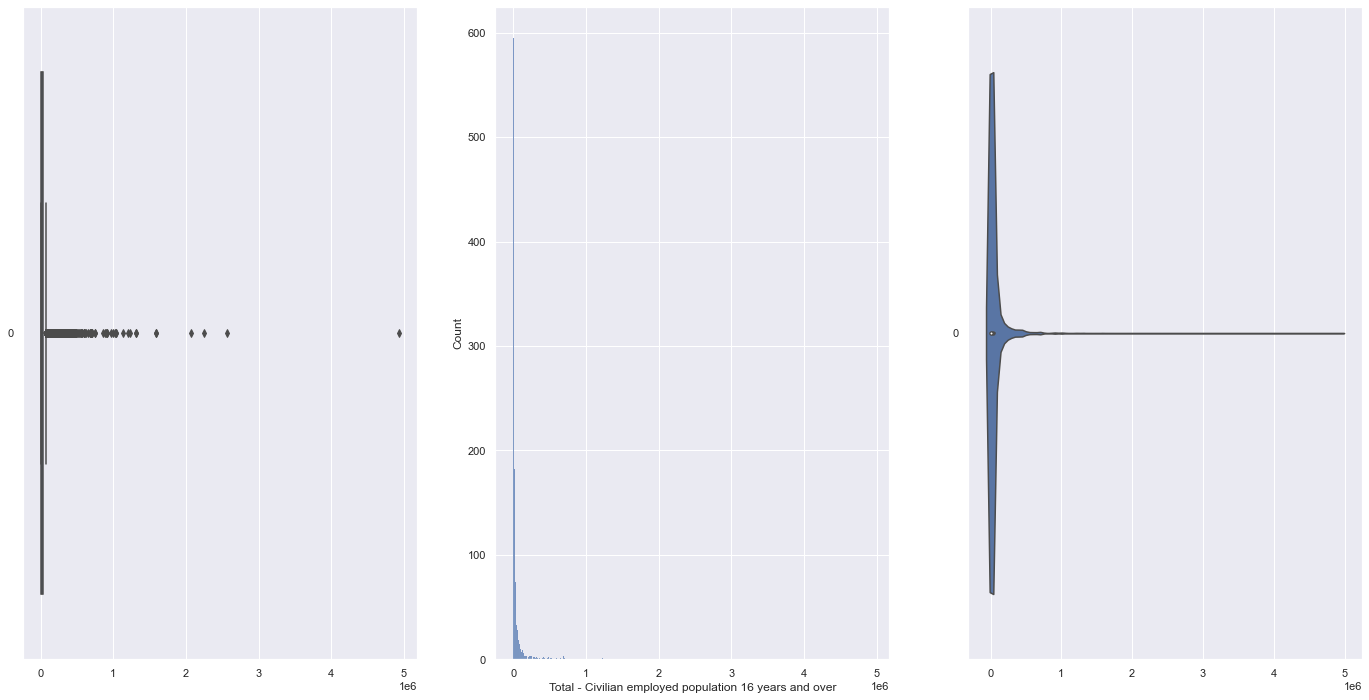

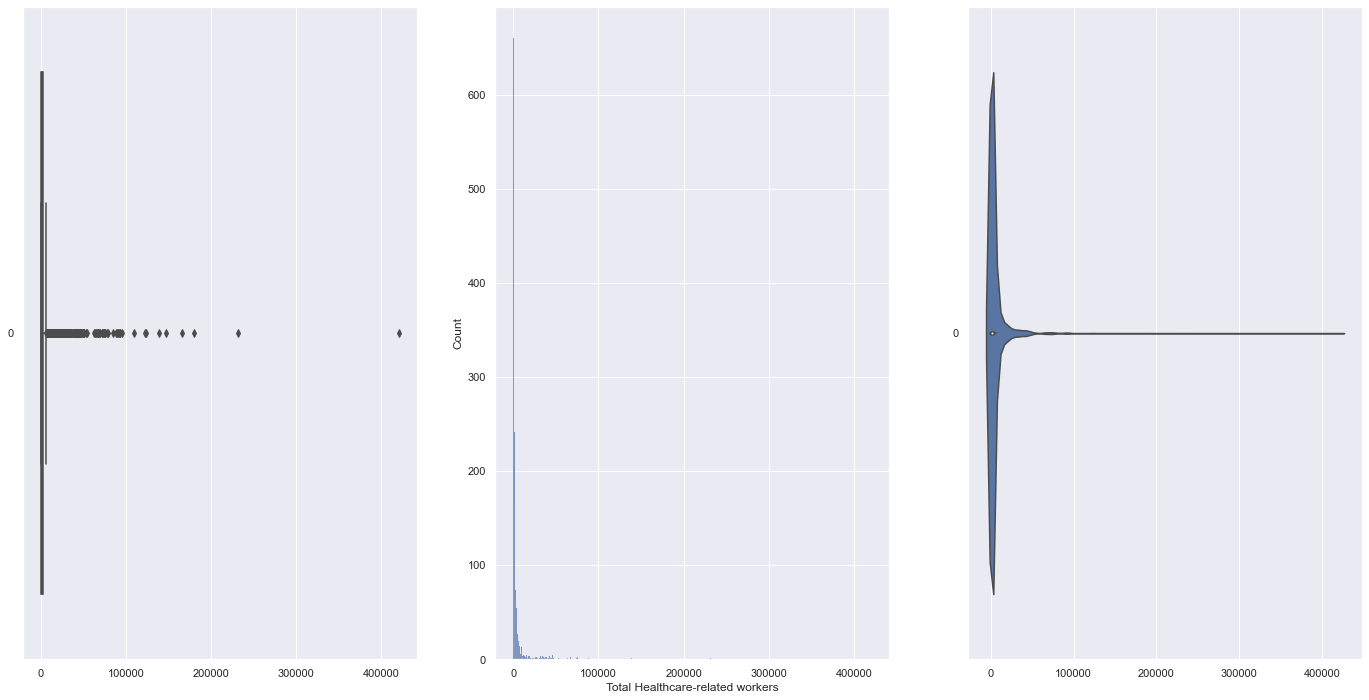

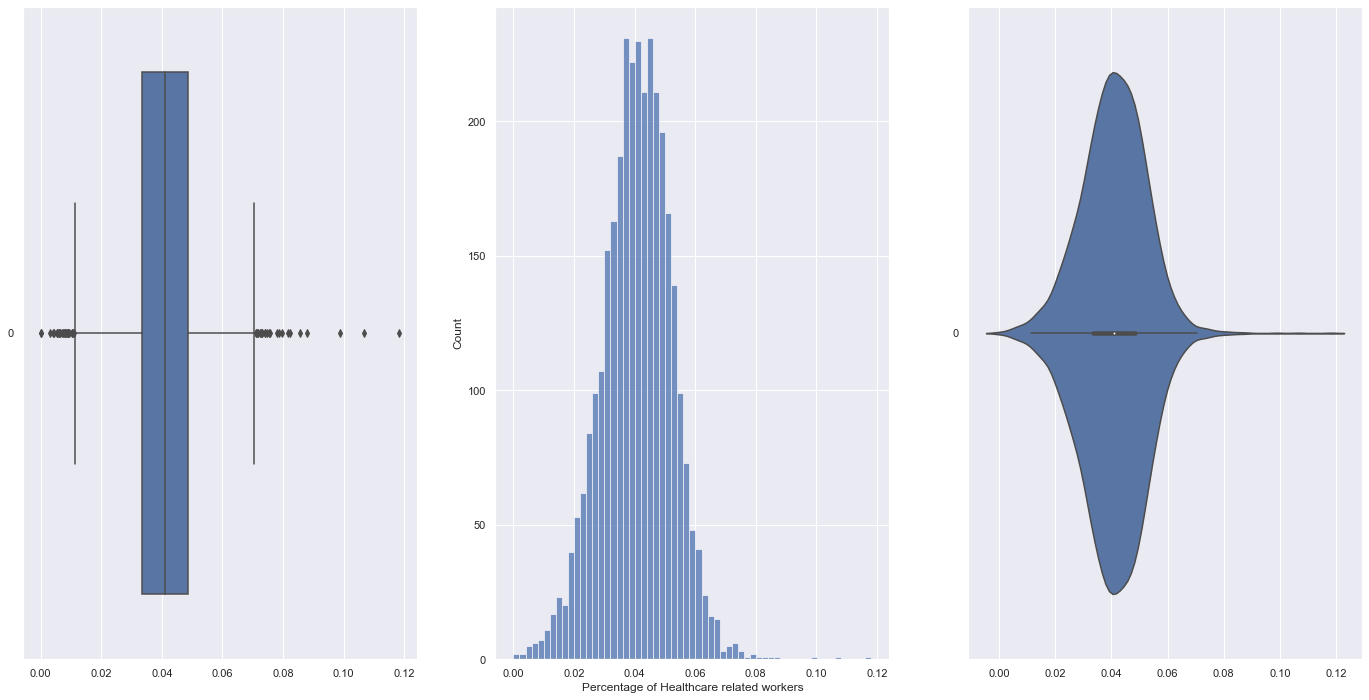

In [8]:
f, axes = plt.subplots(1, 3, figsize=(24, 12))

sb.boxplot(data = usacovid_occuphealth['Total - Civilian employed population 16 years and over'], orient = "h", ax = axes[0])
sb.histplot(data = usacovid_occuphealth['Total - Civilian employed population 16 years and over'], ax = axes[1])
sb.violinplot(data = usacovid_occuphealth['Total - Civilian employed population 16 years and over'], orient = "h", ax = axes[2])

f, axes = plt.subplots(1, 3, figsize=(24, 12))

sb.boxplot(data = usacovid_occuphealth['Total Healthcare-related workers'], orient = "h", ax = axes[0])
sb.histplot(data = usacovid_occuphealth['Total Healthcare-related workers'], ax = axes[1])
sb.violinplot(data = usacovid_occuphealth['Total Healthcare-related workers'], orient = "h", ax = axes[2])

f, axes = plt.subplots(1, 3, figsize=(24, 12))

sb.boxplot(data = usacovid_occuphealth['Percentage of Healthcare related workers'], orient = "h", ax = axes[0])
sb.histplot(data = usacovid_occuphealth['Percentage of Healthcare related workers'], ax = axes[1])
sb.violinplot(data = usacovid_occuphealth['Percentage of Healthcare related workers'], orient = "h", ax = axes[2])

In [9]:
usacovid_occup['Total - Civilian employed population 16 years and over'].skew()

13.696390451589174

In [10]:
usacovid_occup['Total Healthcare-related workers'].skew()

12.632184887289826

In [11]:
usacovid_occup['Percentage of Healthcare related workers'].skew()

0.04816351466667711

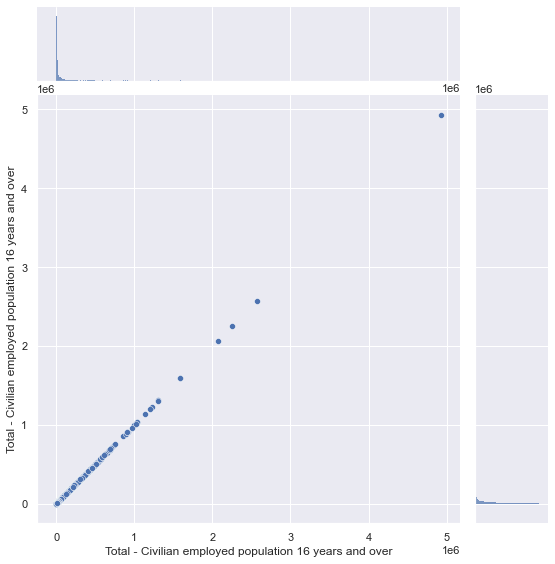

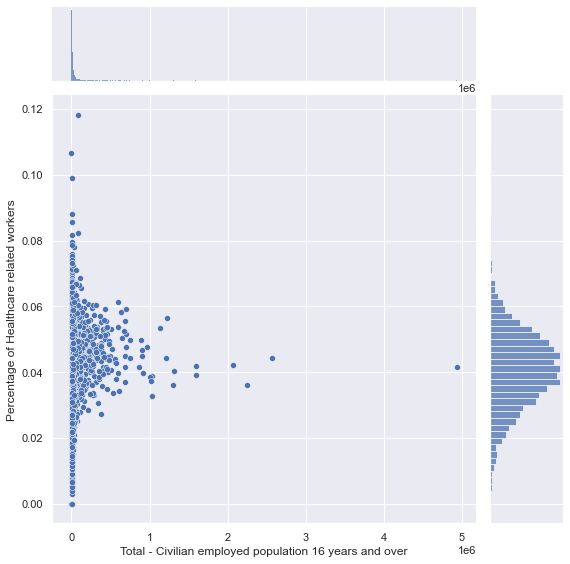

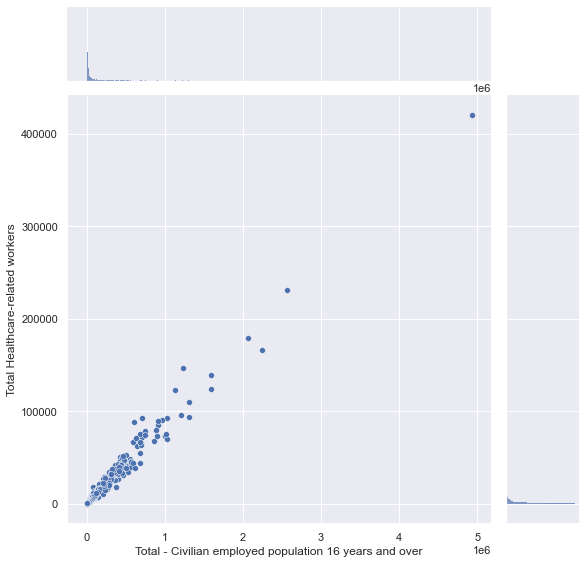

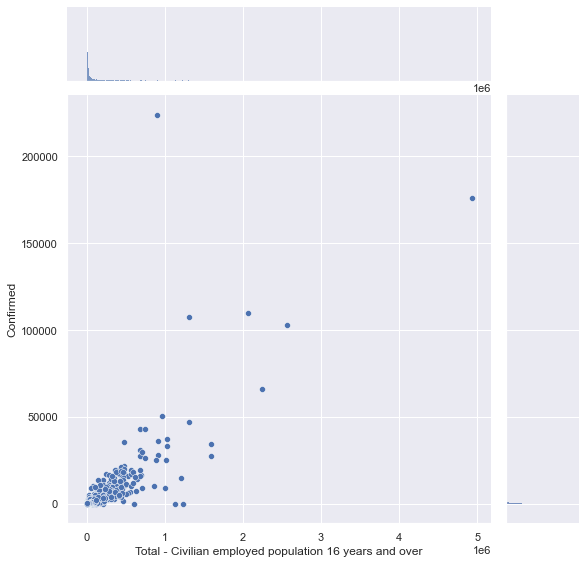

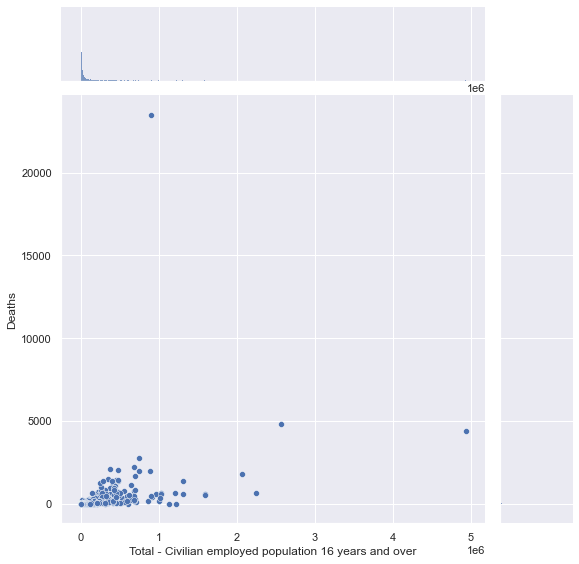

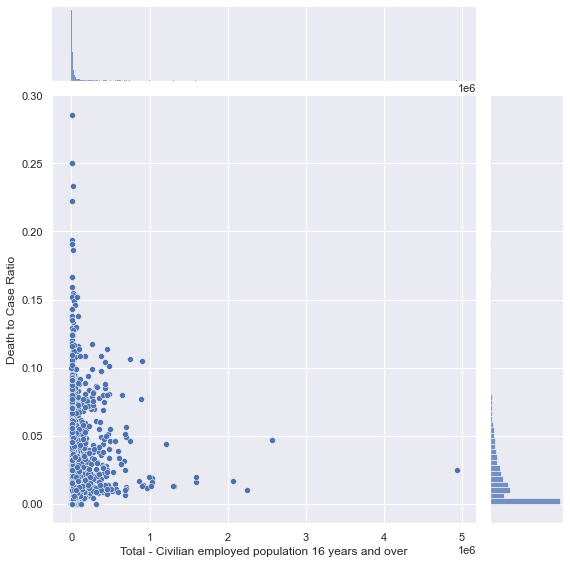

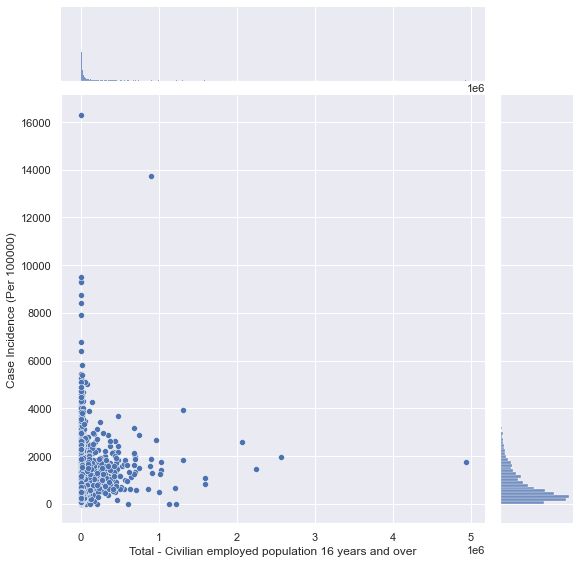

In [12]:
for var in usacovid_occup:
    sb.jointplot(data = usacovid_occup, x = "Total - Civilian employed population 16 years and over", y = var, height = 8)

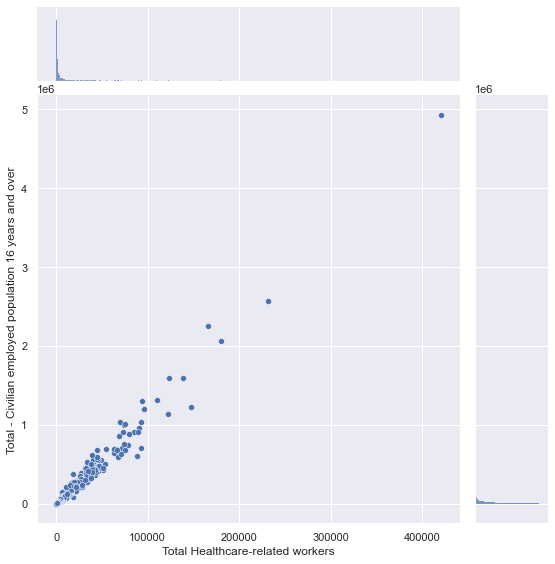

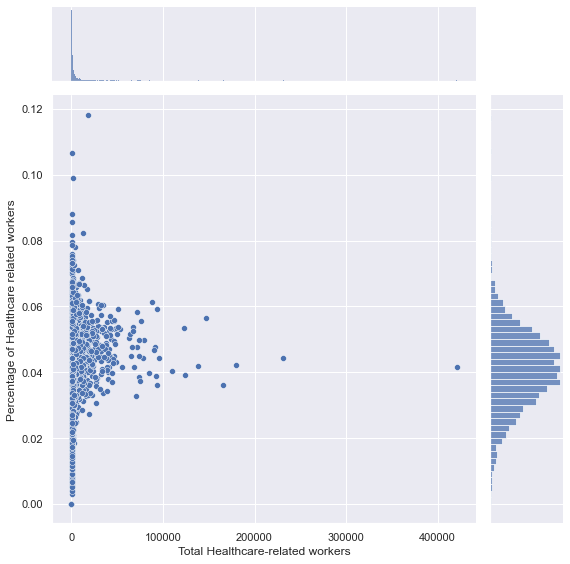

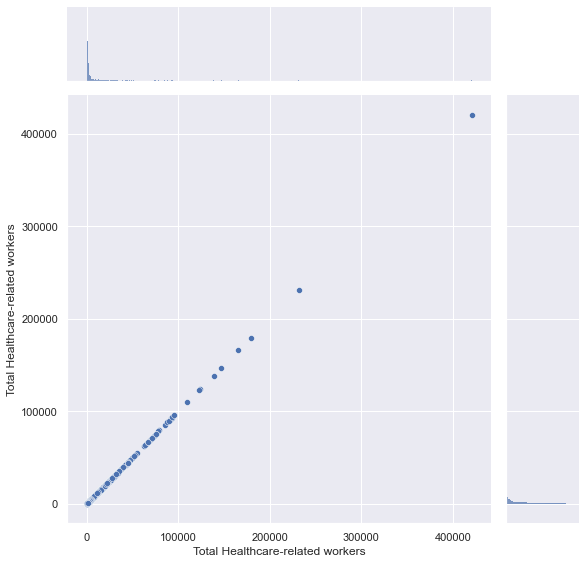

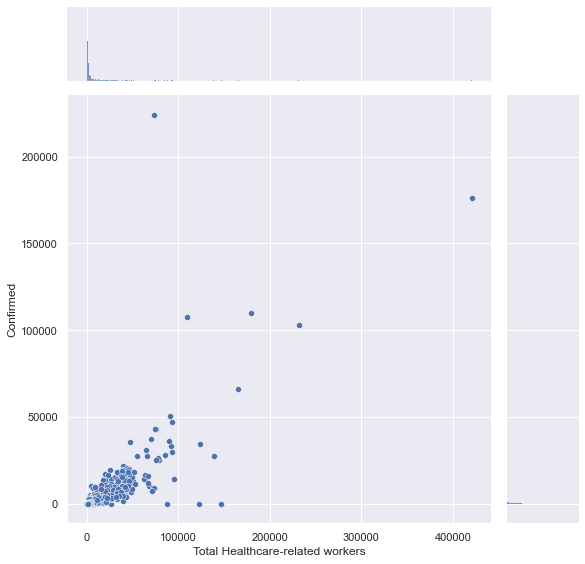

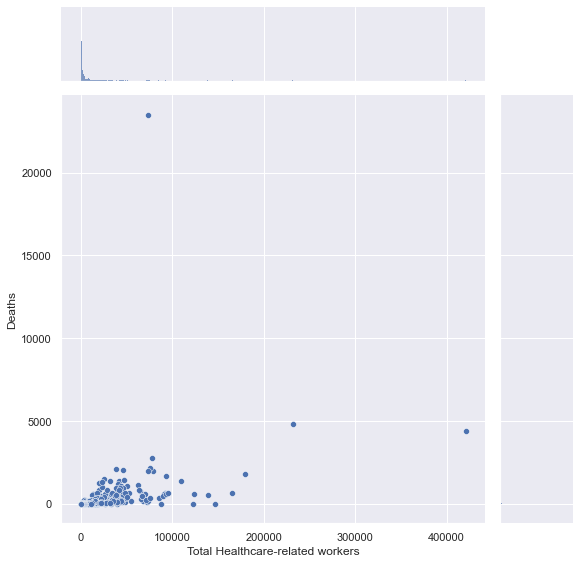

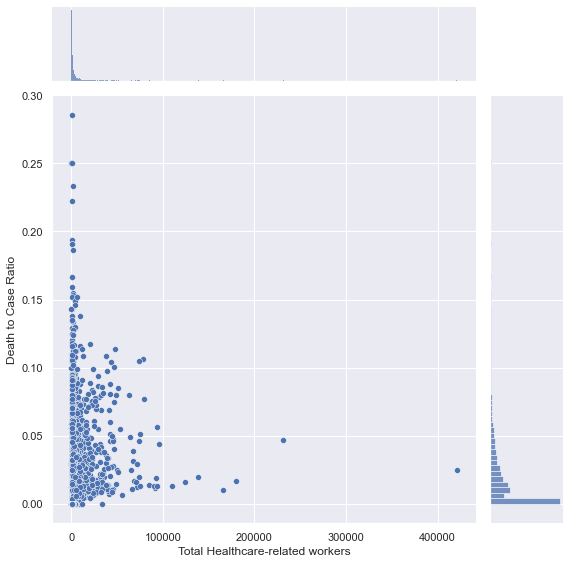

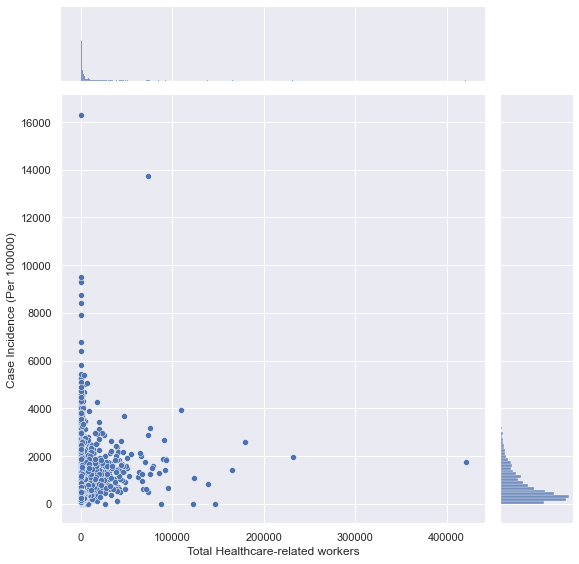

In [13]:
for var in usacovid_occup:
    sb.jointplot(data = usacovid_occup, x = "Total Healthcare-related workers", y = var, height = 8)

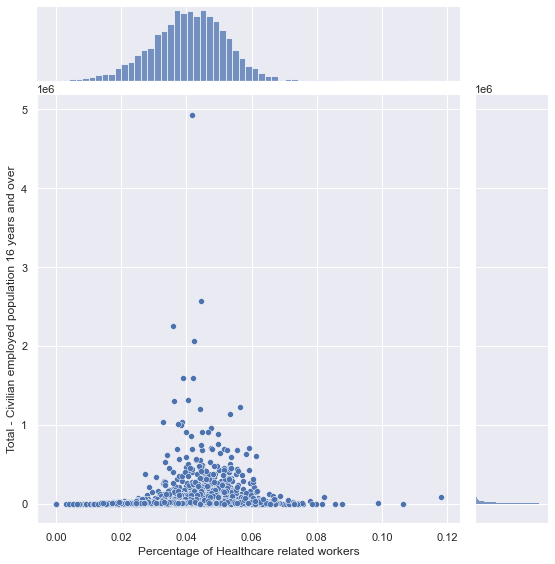

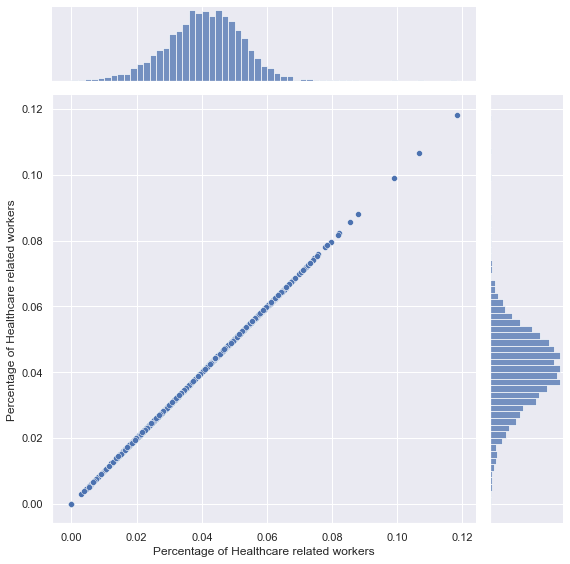

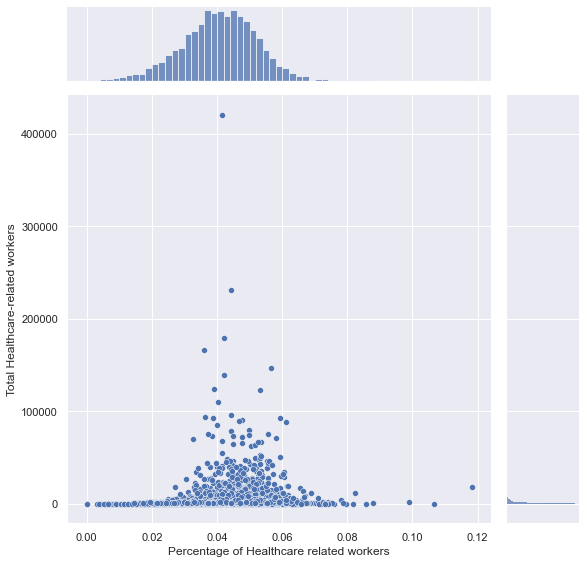

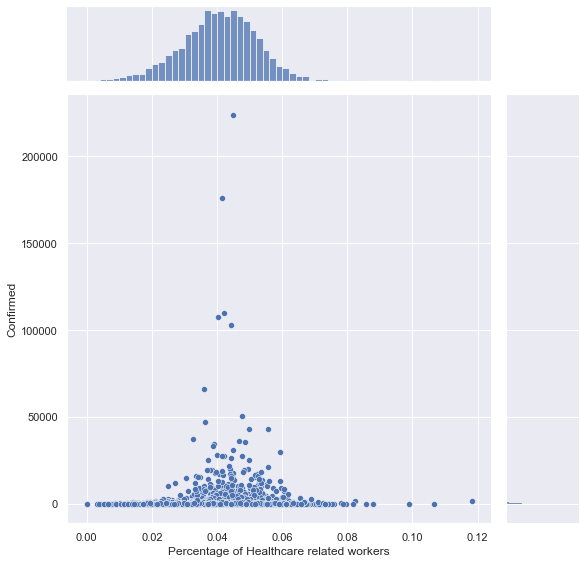

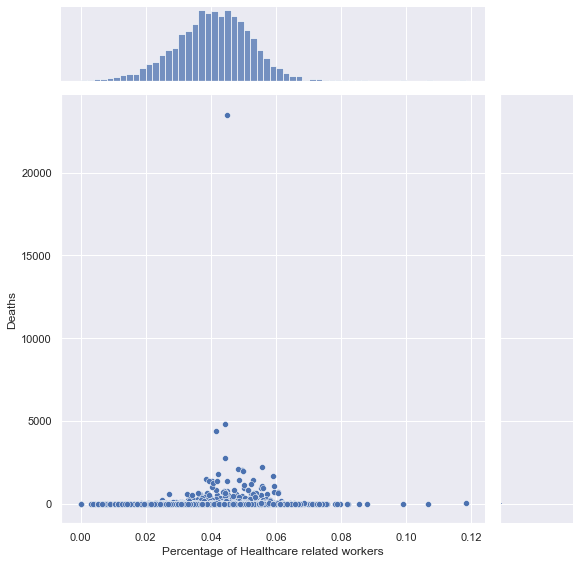

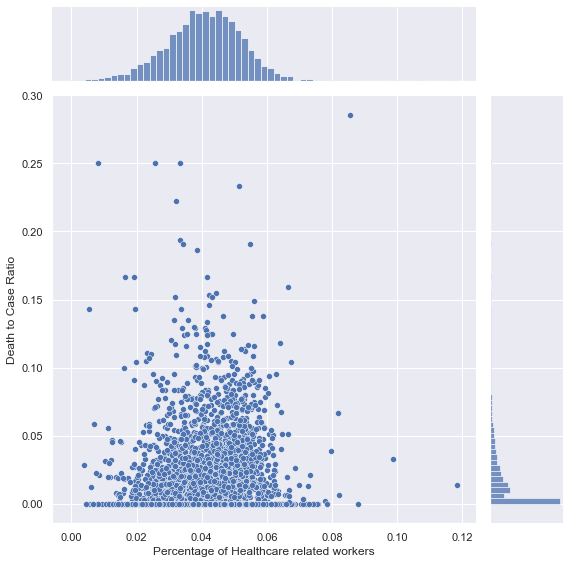

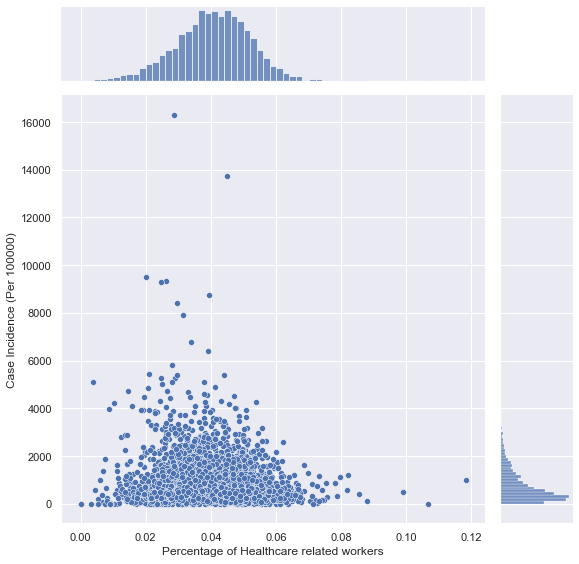

In [14]:
for var in usacovid_occup:
    sb.jointplot(data = usacovid_occup, x = "Percentage of Healthcare related workers", y = var, height = 8)

In [15]:
usacovid_occup.corr()

Total - Civilian employed population 16 years and over  \
Total - Civilian employed population 16 years a...                                           1.000000        
Percentage of Healthcare related workers                                                     0.100887        
Total Healthcare-related workers                                                             0.989096        
Confirmed                                                                                    0.796636        
Deaths                                                                                       0.401484        
Death to Case Ratio                                                                          0.090096        
Case Incidence (Per 100000)                                                                  0.132822        

                                                    Percentage of Healthcare related workers  \
Total - Civilian employed population 16 years a...                                  0.100887   
Percentage of Healthcare related workers                                            1.000000   
Total Healthcare-related workers                                                    0.139218   
Confirmed                                                                           0.046160   
Deaths                                                                              0.040940   
Death to Case Ratio                                                                 0.079415   
Case Incidence (Per 100000)                                                        -0.134617   

                                                    Total Healthcare-related workers  \
Total - Civilian employed population 16 years a...                          0.989096   
Percentage of Healthcare related workers                                    0.139218   
Total Healthcare-related workers                                            1.000000   
Confirmed                                                                   0.776624   
Deaths                                                                      0.399354   
Death to Case Ratio                                                         0.104059   
Case Incidence (Per 100000)                                                 0.128104   

                                                    Confirmed    Deaths  \
Total - Civilian employed population 16 years a...   0.796636  0.401484   
Percentage of Healthcare related workers             0.046160  0.040940   
Total Healthcare-related workers                     0.776624  0.399354   
Confirmed                                            1.000000  0.794622   
Deaths                                               0.794622  1.000000   
Death to Case Ratio                                  0.084918  0.135629   
Case Incidence (Per 100000)                          0.296615  0.284435   

                                                    Death to Case Ratio  \
Total - Civilian employed population 16 years a...             0.090096   
Percentage of Healthcare related workers                       0.079415   
Total Healthcare-related workers                               0.104059   
Confirmed                                                      0.084918   
Deaths                                                         0.135629   
Death to Case Ratio                                            1.000000   
Case Incidence (Per 100000)                                    0.094840   

                                                    Case Incidence (Per 100000)  
Total - Civilian employed population 16 years a...                     0.132822  
Percentage of Healthcare related workers                              -0.134617  
Total Healthcare-related workers                                       0.128104  
Confirmed                                                              0.296615  
Deaths                                                                 0.284435  
Dea

<AxesSubplot:>

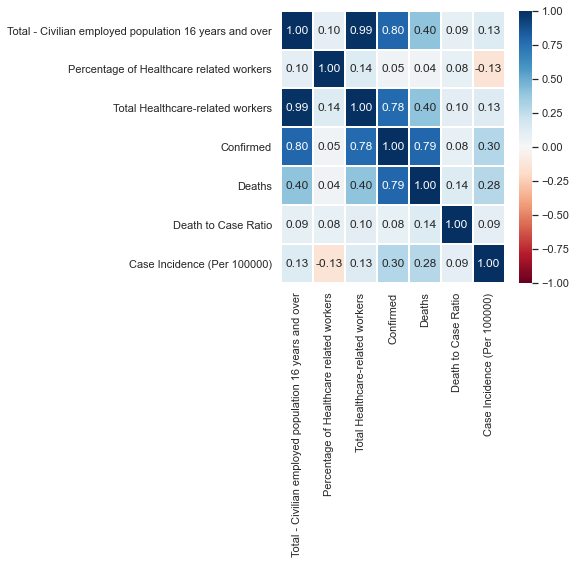

In [16]:
f = plt.figure(figsize=(5, 5))
sb.heatmap(usacovid_occup.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 12}, cmap = "RdBu")

Placing each of the response variables against the predictor variable *Total - Civilian employed population 16 years and over*, *Total Healthcare-related workers* and *Percentage of Healthcare related workers*, we see that the correlation between the variables to be fairly high for *Confirmed* cases, moderately high for *Deaths* except for the *Percentage of Healthcare related workers* variable. It also seems like the *Case Incidence* variable fits into the distribution of both *Total - Civilian employed population 16 years and over* and *Total Healthcare-related workers*, wita little negative correlation with *Percentage of Healthcare related workers*. That is quite interesting. Now, let's see if the situation will change when we remove the outliers.

In [17]:
usacovid_occup_clean = pd.DataFrame(removeOutliers(usacovid_occup))

In [18]:
usacovid_occup_clean.head()

Total - Civilian employed population 16 years and over  \
0                                              24522        
2                                               8413        
3                                               8387        
4                                              21917        
7                                              47896        

   Percentage of Healthcare related workers  Total Healthcare-related workers  \
0                                  0.036467                            2013.0   
2                                  0.019393                             500.0   
3                                  0.027079                             610.0   
4                                  0.041669                            2402.0   
7                                  0.036265                            4174.0   

   Confirmed  Deaths  Death to Case Ratio  Case Incidence (Per 100000)  
0      932.0    20.0             0.021459                  1688.405797  
2      529.0     4.0             0.007561                  2051.819099  
3      327.0     2.0             0.006116                  1451.591424  
4      601.0     1.0             0.001664                  1042.588256  
7     1157.0     6.0             0.005186                  1005.230325

In [19]:
usacovid_occup_clean.describe()

Total - Civilian employed population 16 years and over  \
count                                        2290.000000        
mean                                        12735.227948        
std                                         12360.844441        
min                                           172.000000        
25%                                          4076.250000        
50%                                          8315.000000        
75%                                         17462.500000        
max                                         65645.000000        

       Percentage of Healthcare related workers  \
count                               2290.000000   
mean                                   0.040144   
std                                    0.010954   
min                                    0.011276   
25%                                    0.032832   
50%                                    0.040278   
75%                                    0.047872   
max                                    0.070517   

       Total Healthcare-related workers    Confirmed       Deaths  \
count                       2290.000000  2290.000000  2290.000000   
mean                        1215.950655   191.517031     3.315721   
std                         1223.765178   239.279974     5.600066   
min                            7.000000     1.000000     0.000000   
25%                          367.250000    34.000000     0.000000   
50%                          775.000000    99.000000     1.000000   
75%                         1662.750000   255.750000     4.000000   
max                         6700.000000  1386.000000    32.000000   

       Death to Case Ratio  Case Incidence (Per 100000)  
count          2290.000000                  2290.000000  
mean              0.013742                   634.218814  
std               0.017057                   535.569182  
min               0.000000                    17.765145  
25%               0.000000                   246.687119  
50%               0.008130                   446.221868  
75%               0.022198                   861.205344  
max               0.074074                  2480.875098

<AxesSubplot:>

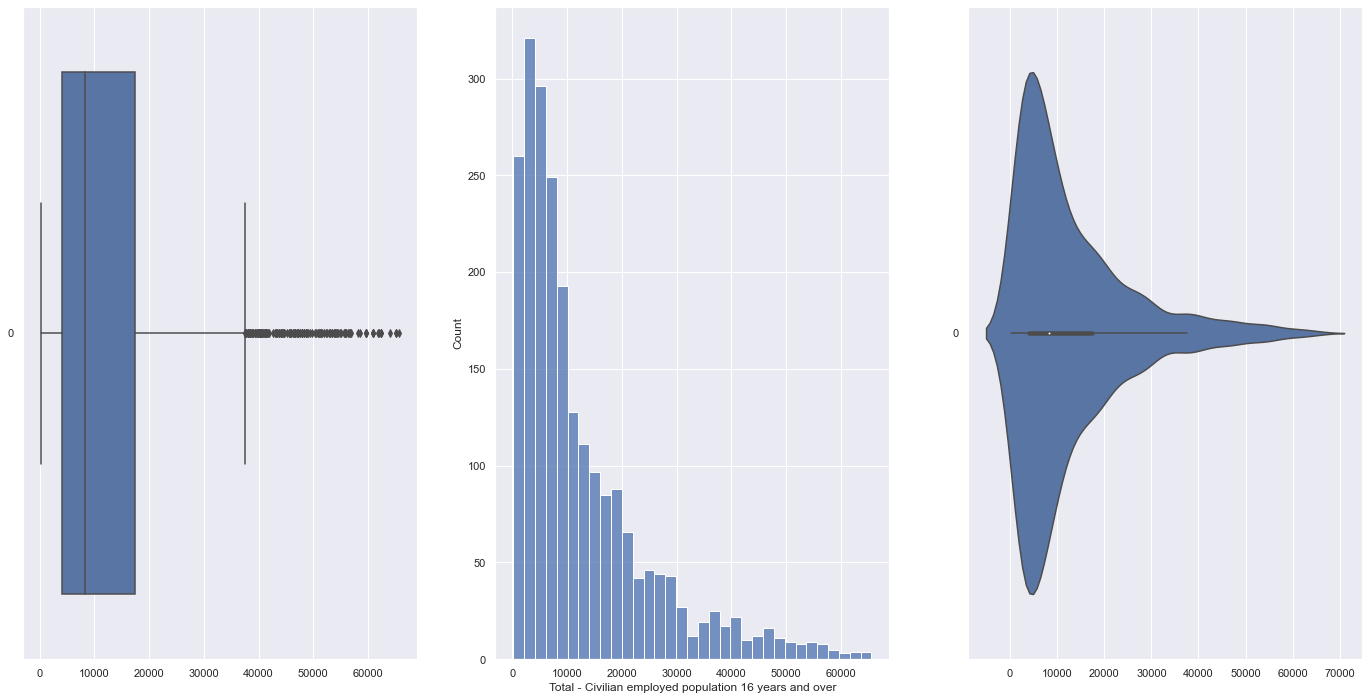

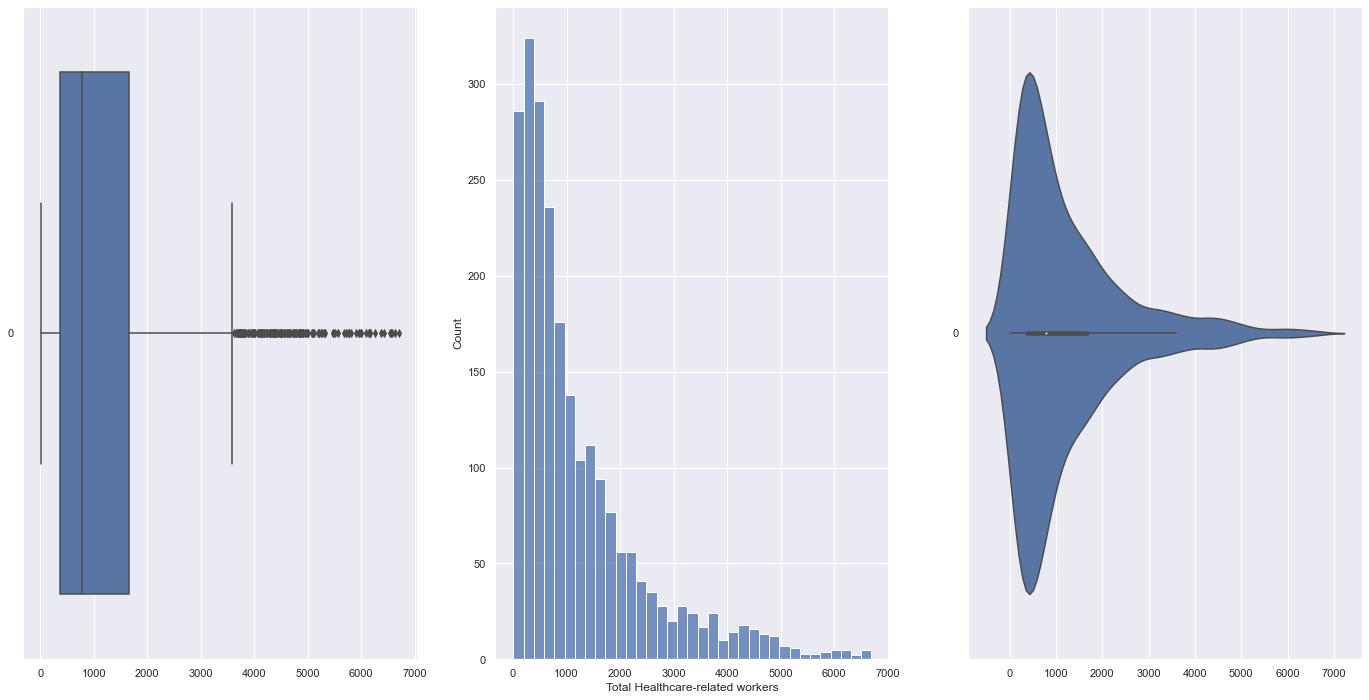

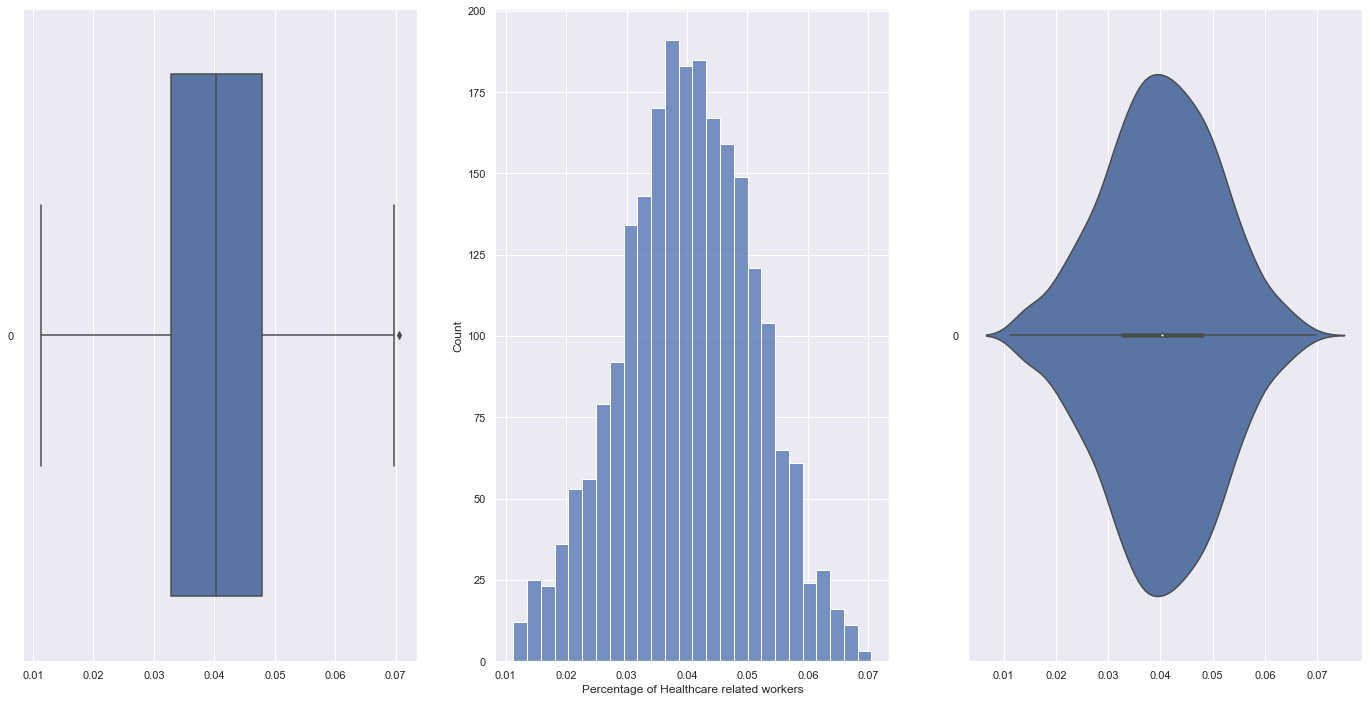

In [20]:
f, axes = plt.subplots(1, 3, figsize=(24, 12))

sb.boxplot(data = usacovid_occup_clean['Total - Civilian employed population 16 years and over'], orient = "h", ax = axes[0])
sb.histplot(data = usacovid_occup_clean['Total - Civilian employed population 16 years and over'], ax = axes[1])
sb.violinplot(data = usacovid_occup_clean['Total - Civilian employed population 16 years and over'], orient = "h", ax = axes[2])

f, axes = plt.subplots(1, 3, figsize=(24, 12))

sb.boxplot(data = usacovid_occup_clean['Total Healthcare-related workers'], orient = "h", ax = axes[0])
sb.histplot(data = usacovid_occup_clean['Total Healthcare-related workers'], ax = axes[1])
sb.violinplot(data = usacovid_occup_clean['Total Healthcare-related workers'], orient = "h", ax = axes[2])

f, axes = plt.subplots(1, 3, figsize=(24, 12))

sb.boxplot(data = usacovid_occup_clean['Percentage of Healthcare related workers'], orient = "h", ax = axes[0])
sb.histplot(data = usacovid_occup_clean['Percentage of Healthcare related workers'], ax = axes[1])
sb.violinplot(data = usacovid_occup_clean['Percentage of Healthcare related workers'], orient = "h", ax = axes[2])

In [21]:
usacovid_occup_clean['Total - Civilian employed population 16 years and over'].skew()

1.685090062868252

In [22]:
usacovid_occup_clean['Total Healthcare-related workers'].skew()

1.760275995511564

In [23]:
usacovid_occup_clean['Percentage of Healthcare related workers'].skew()

-0.08501589256775911

With the outliers removed, we see a relatively symmetrical distribution for *Total - Civilian employed population 16 years and over* and *Total Healthcare-related workers*, with a much lower skewness at 1.69 and 1.76. However, it is still heavily right skewed. On the other hand, the *Percentage of Healthcare related workers* variable seems to be negatively skewed after removing the outliers, interesting. Nevertheless, let us plot this new data set without outliers against our response variables.

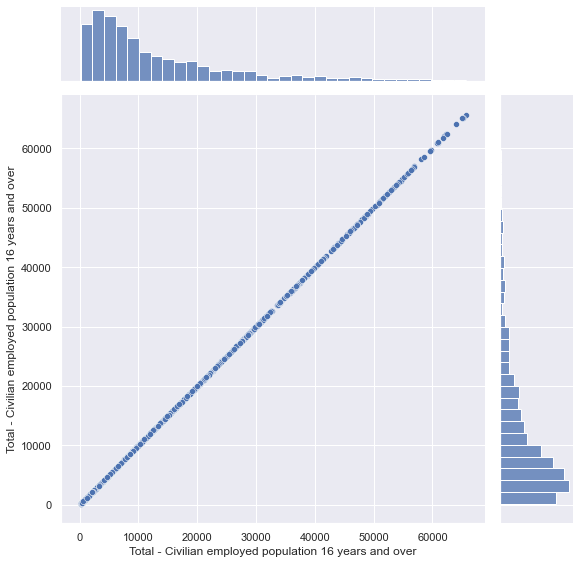

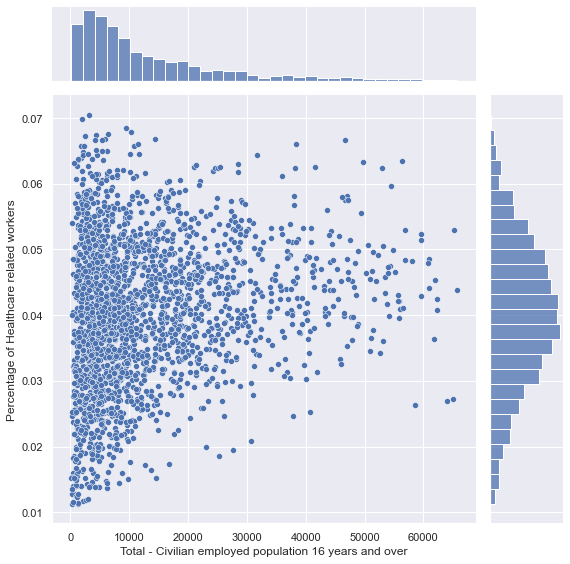

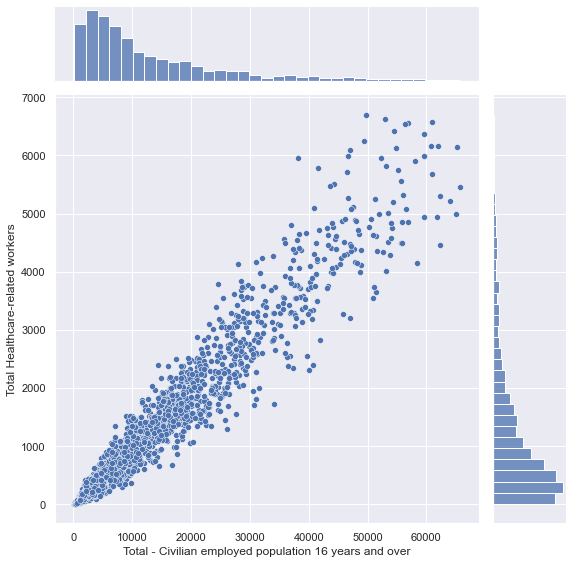

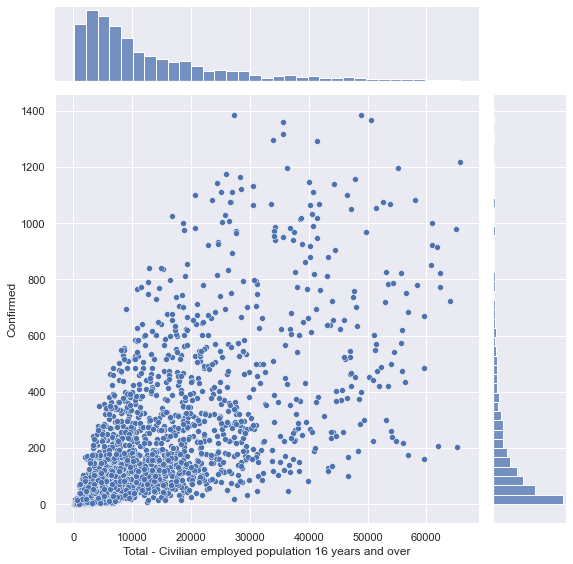

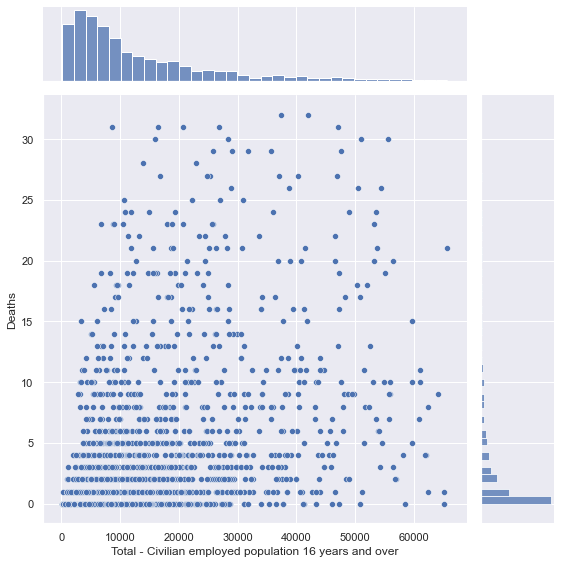

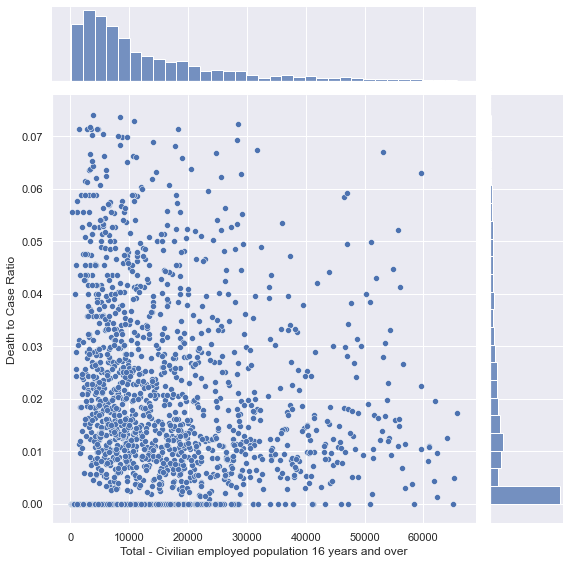

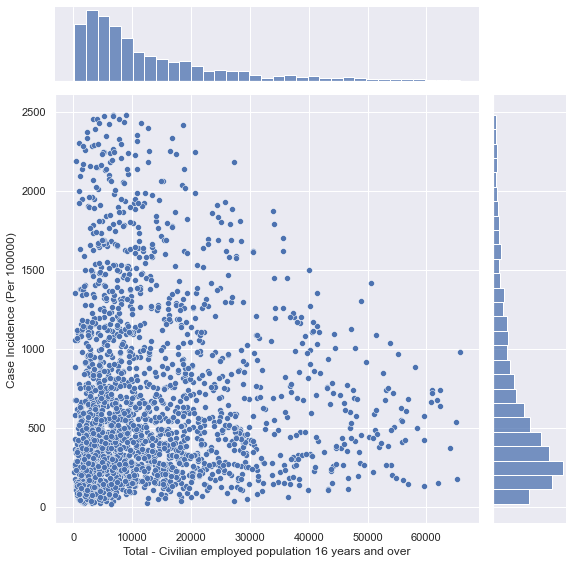

In [24]:
for var in usacovid_occup_clean:
    sb.jointplot(data = usacovid_occup_clean, x = "Total - Civilian employed population 16 years and over", y = var, height = 8)

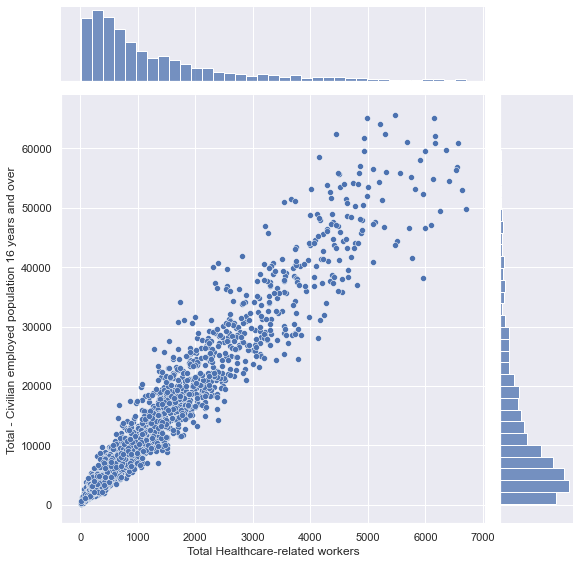

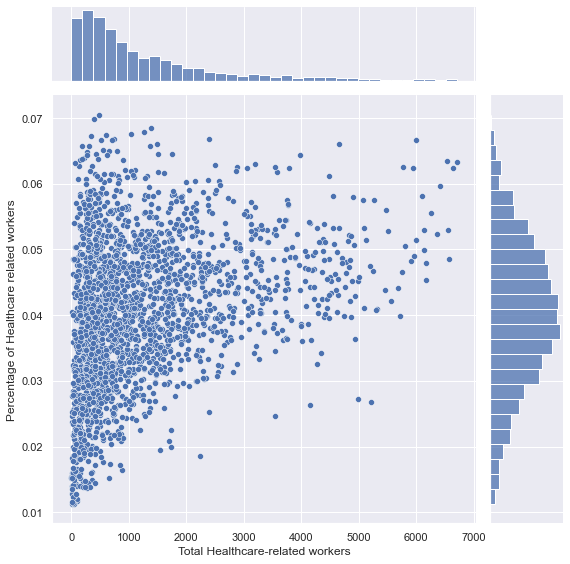

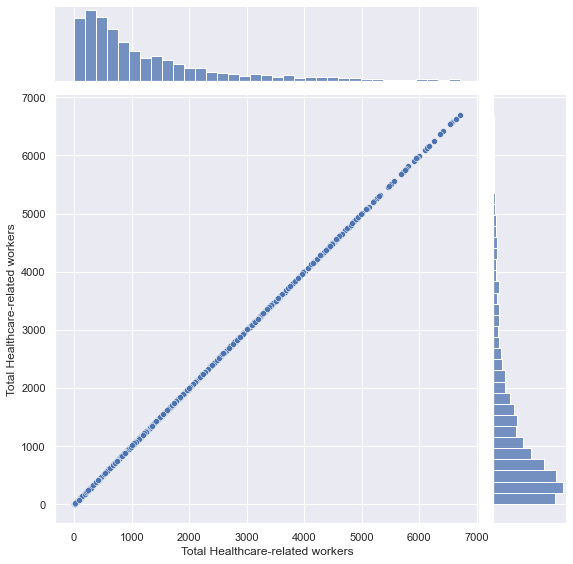

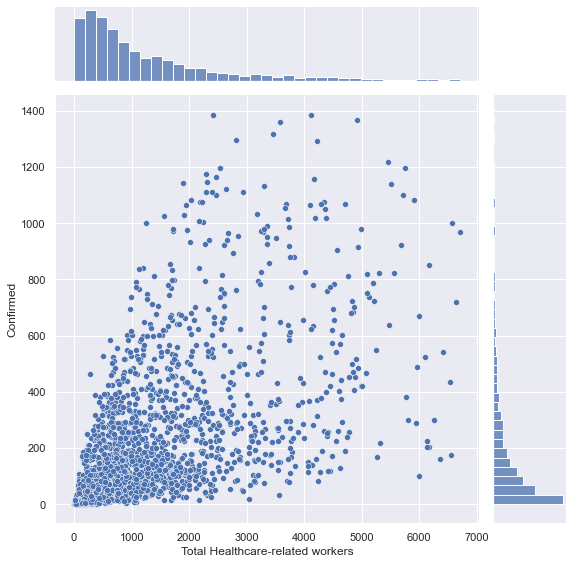

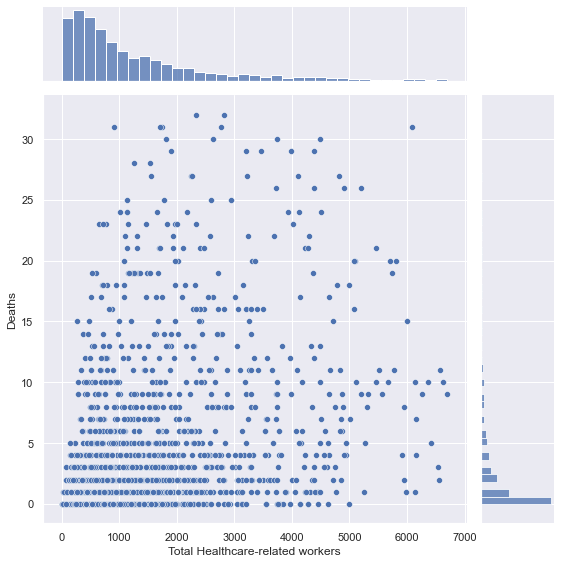

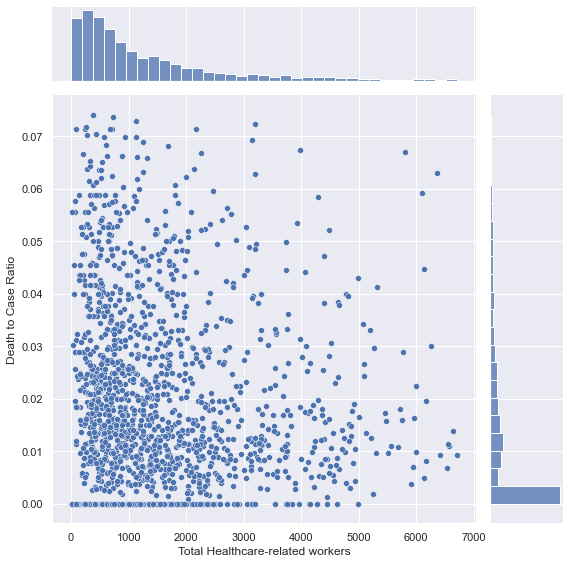

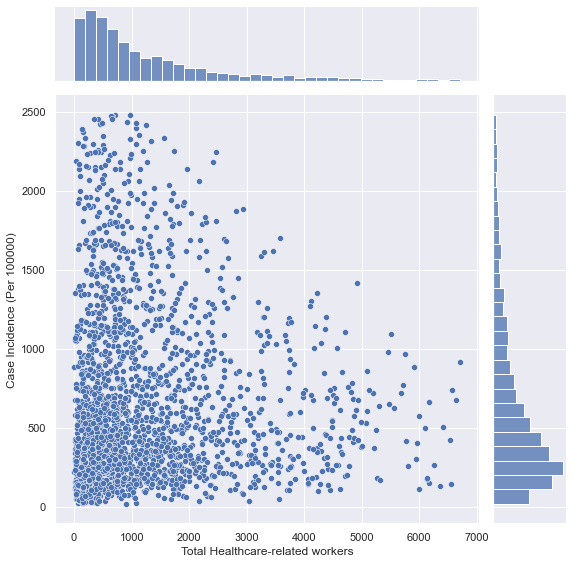

In [25]:
for var in usacovid_occup_clean:
    sb.jointplot(data = usacovid_occup_clean, x = "Total Healthcare-related workers", y = var, height = 8)

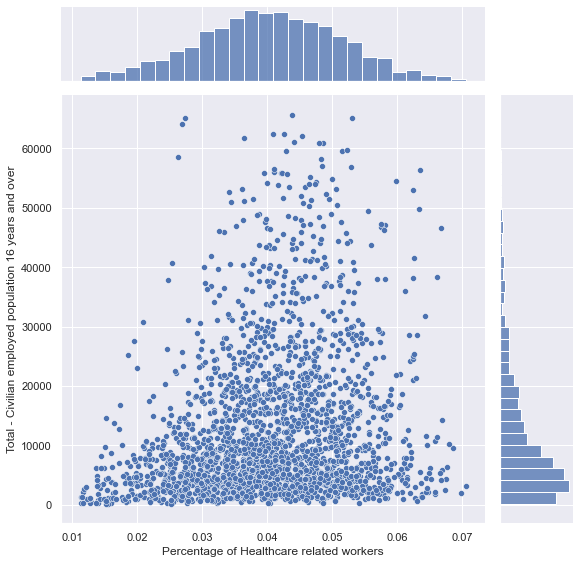

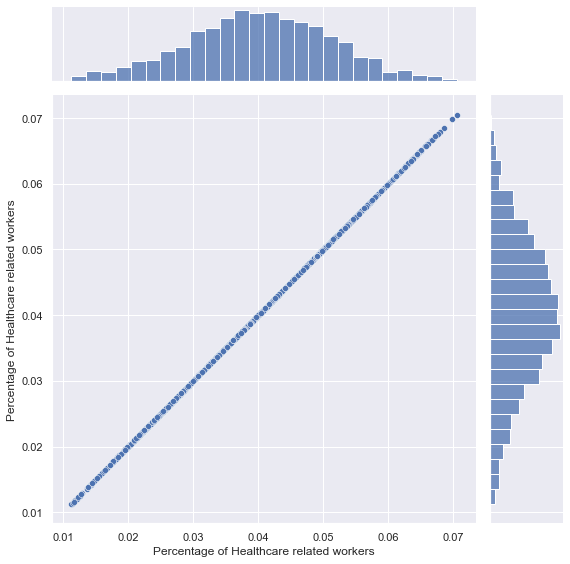

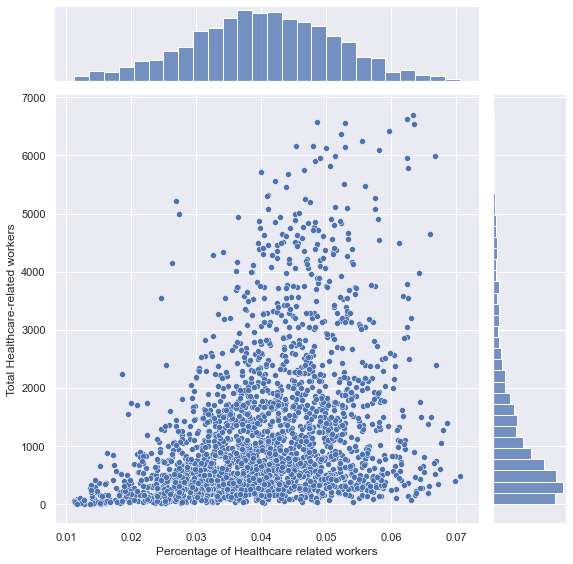

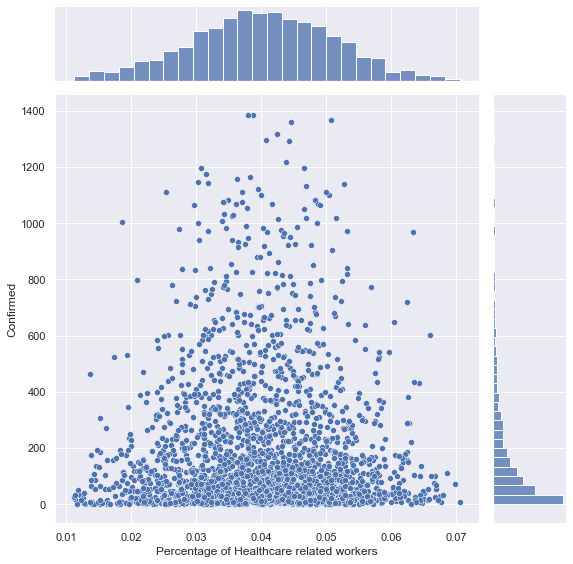

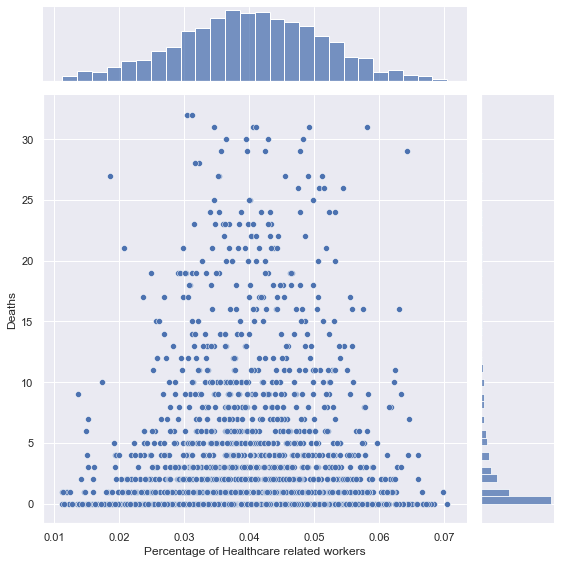

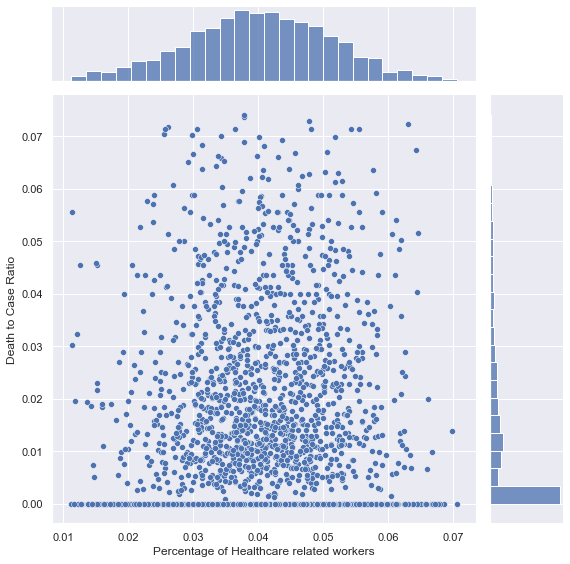

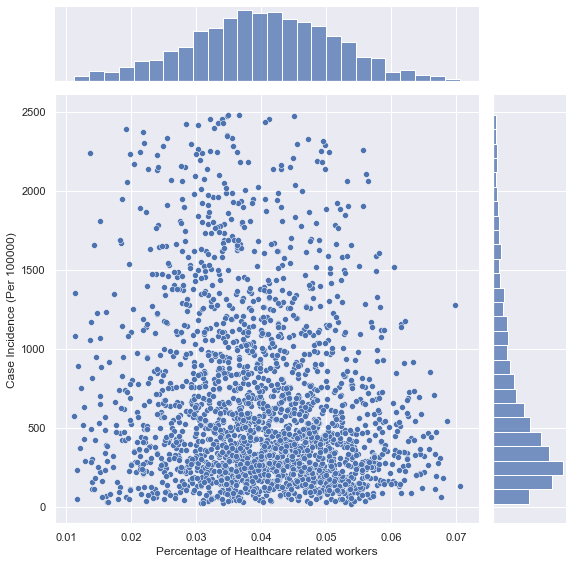

In [26]:
for var in usacovid_occup_clean:
    sb.jointplot(data = usacovid_occup_clean, x = "Percentage of Healthcare related workers", y = var, height = 8)

In [27]:
usacovid_occup_clean.corr()

Total - Civilian employed population 16 years and over  \
Total - Civilian employed population 16 years a...                                           1.000000        
Percentage of Healthcare related workers                                                     0.204618        
Total Healthcare-related workers                                                             0.965765        
Confirmed                                                                                    0.664888        
Deaths                                                                                       0.463136        
Death to Case Ratio                                                                          0.163979        
Case Incidence (Per 100000)                                                                  0.030929        

                                                    Percentage of Healthcare related workers  \
Total - Civilian employed population 16 years a...                                  0.204618   
Percentage of Healthcare related workers                                            1.000000   
Total Healthcare-related workers                                                    0.341177   
Confirmed                                                                          -0.002978   
Deaths                                                                              0.025537   
Death to Case Ratio                                                                 0.048366   
Case Incidence (Per 100000)                                                        -0.167401   

                                                    Total Healthcare-related workers  \
Total - Civilian employed population 16 years a...                          0.965765   
Percentage of Healthcare related workers                                    0.341177   
Total Healthcare-related workers                                            1.000000   
Confirmed                                                                   0.607930   
Deaths                                                                      0.435966   
Death to Case Ratio                                                         0.167089   
Case Incidence (Per 100000)                                                -0.004773   

                                                    Confirmed    Deaths  \
Total - Civilian employed population 16 years a...   0.664888  0.463136   
Percentage of Healthcare related workers            -0.002978  0.025537   
Total Healthcare-related workers                     0.607930  0.435966   
Confirmed                                            1.000000  0.710262   
Deaths                                               0.710262  1.000000   
Death to Case Ratio                                  0.167647  0.584025   
Case Incidence (Per 100000)                          0.596100  0.490067   

                                                    Death to Case Ratio  \
Total - Civilian employed population 16 years a...             0.163979   
Percentage of Healthcare related workers                       0.048366   
Total Healthcare-related workers                               0.167089   
Confirmed                                                      0.167647   
Deaths                                                         0.584025   
Death to Case Ratio                                            1.000000   
Case Incidence (Per 100000)                                    0.218582   

                                                    Case Incidence (Per 100000)  
Total - Civilian employed population 16 years a...                     0.030929  
Percentage of Healthcare related workers                              -0.167401  
Total Healthcare-related workers                                      -0.004773  
Confirmed                                                              0.596100  
Deaths                                                                 0.490067  
Dea

<AxesSubplot:>

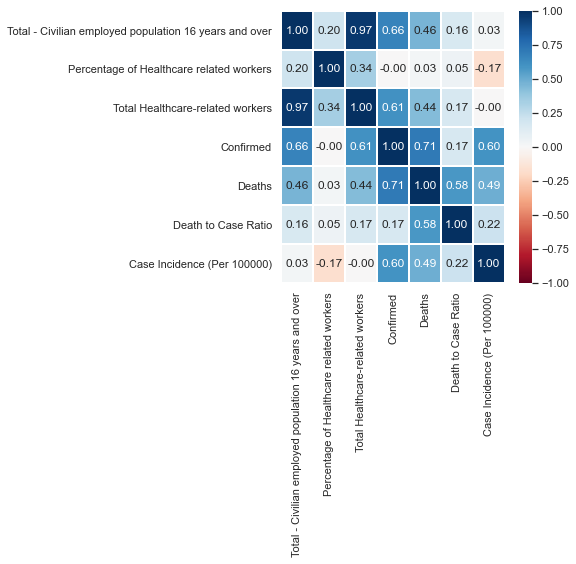

In [28]:
f = plt.figure(figsize=(5, 5))
sb.heatmap(usacovid_occup_clean.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 12}, cmap = "RdBu")

Here we see there is quite a vivid linear correlation between our predictor *Total - Civilian employed population 16 years and over and Total Healthcare-related workers* and the response variables, besides the low linear correlation between both of the predictors and *Death to Case Ratio* and *Case Incidence*. However, there is practically no linear correlation between *Percentage of Healthcare related workers* and the response variables, except a slight negative correlation with *Case Incidence*.  Nevertheless, let us continue and observe other aspects of occupation parameters to see if we can build a fruitful model for the response variable.

## Bi-Variate Analysis: Total population without healthcare access and Percent of Population with No Health Insurance Coverage as a Predictor Variable

In [29]:
usacovid_health = usacovid_occuphealth[['Total population without healthcare access', 'Percent of Population with No Health Insurance Coverage', 'Confirmed', 'Deaths', 'Death to Case Ratio', 'Case Incidence (Per 100000)']]
usacovid_health.head()

Total population without healthcare access  \
0                                        3856   
1                                       18679   
2                                        2544   
3                                        2201   
4                                        6159   

   Percent of Population with No Health Insurance Coverage  Confirmed  Deaths  \
0                                                7.1              932      20   
1                                                8.9             2727      17   
2                                               11.3              529       4   
3                                               10.7              327       2   
4                                               10.8              601       1   

   Death to Case Ratio  Case Incidence (Per 100000)  
0             0.021459                  1688.405797  
1             0.006234                  1310.383601  
2             0.007561                  2051.819099  
3             0.006116                  1451.591424  
4             0.001664                  1042.588256

In [30]:
usacovid_health.describe()

Total population without healthcare access  \
count                                 3220.000000   
mean                                  8839.888199   
std                                  35466.447087   
min                                      0.000000   
25%                                    923.750000   
50%                                   2259.500000   
75%                                   5625.500000   
max                                 965181.000000   

       Percent of Population with No Health Insurance Coverage      Confirmed  \
count                                        3220.000000          3220.000000   
mean                                            9.549627          1316.137578   
std                                             5.086483          6962.304363   
min                                             0.000000             0.000000   
25%                                             5.700000            43.000000   
50%                                             8.600000           158.000000   
75%                                            12.000000           585.000000   
max                                            46.300000        224051.000000   

            Deaths  Death to Case Ratio  Case Incidence (Per 100000)  
count   3220.00000          3159.000000                  3220.000000  
mean      45.27764             0.021551                   878.110783  
std      456.31641             0.028900                   983.144191  
min        0.00000             0.000000                     0.000000  
25%        0.00000             0.000000                   274.108881  
50%        2.00000             0.012367                   565.918482  
75%       13.00000             0.029668                  1165.665050  
max    23500.00000             0.285714                 16306.278070

<AxesSubplot:>

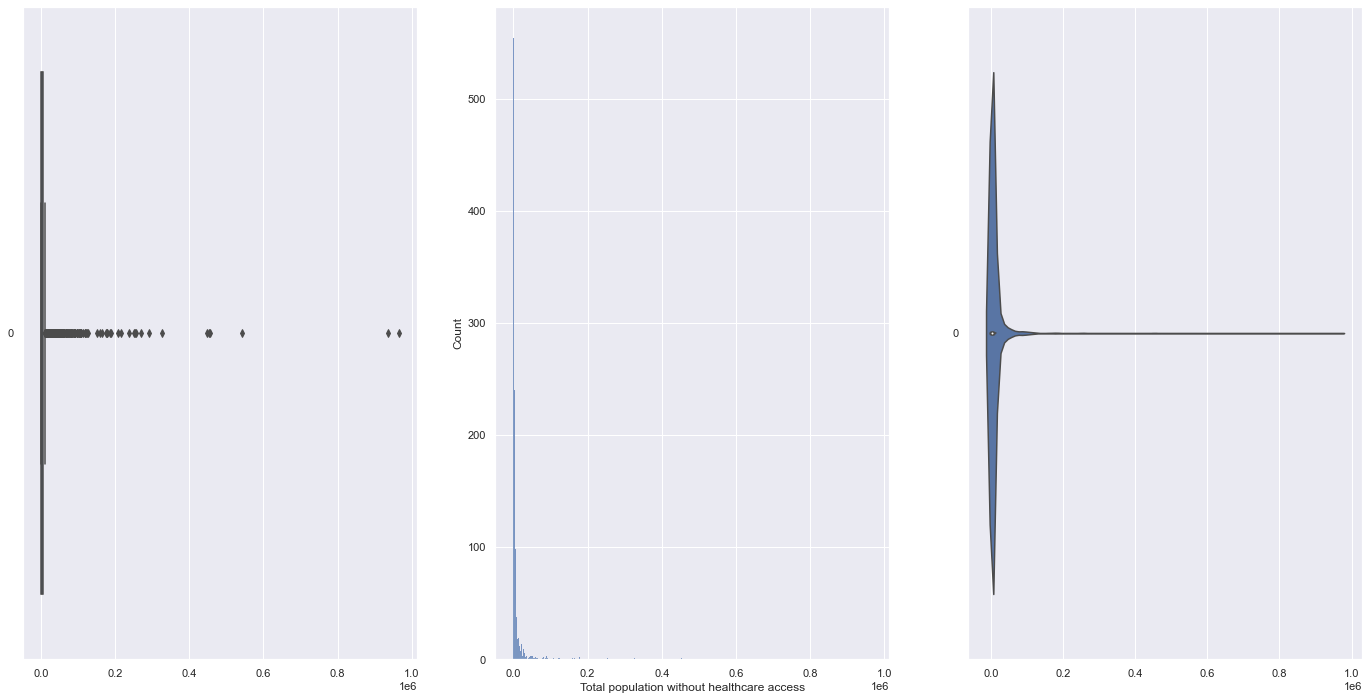

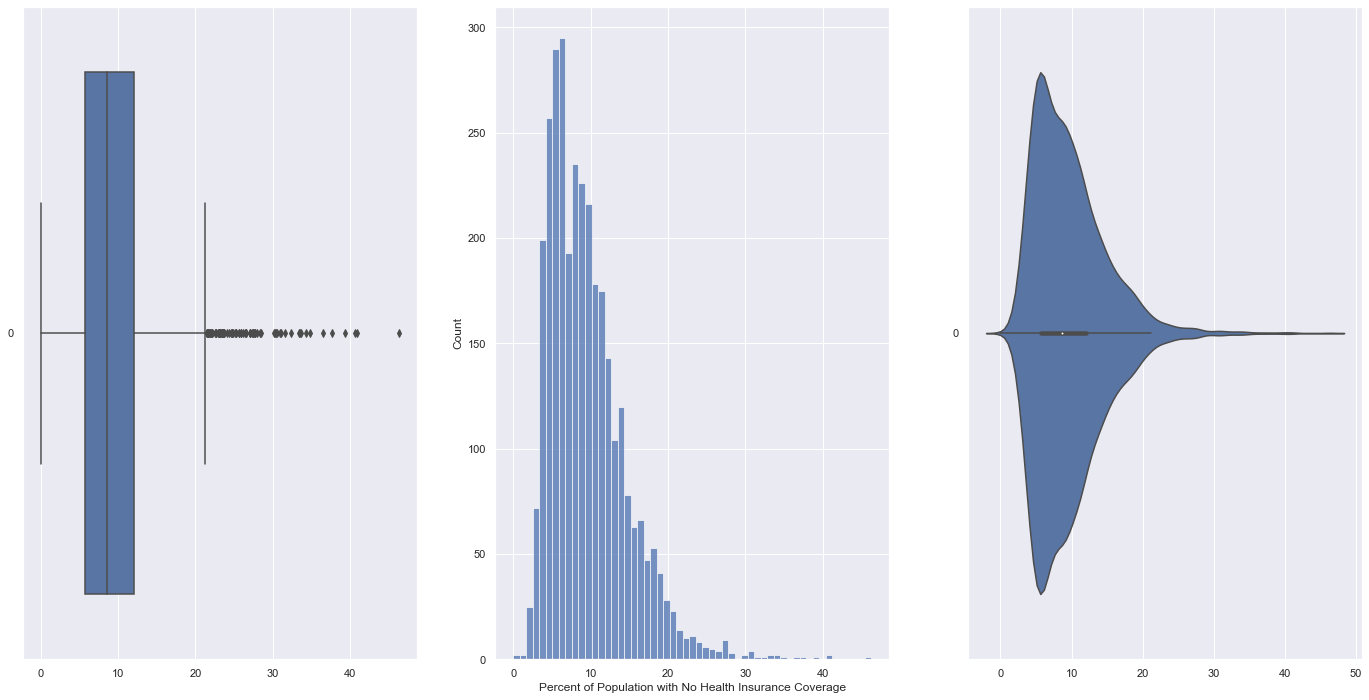

In [31]:
f, axes = plt.subplots(1, 3, figsize=(24, 12))

sb.boxplot(data = usacovid_health['Total population without healthcare access'], orient = "h", ax = axes[0])
sb.histplot(data = usacovid_health['Total population without healthcare access'], ax = axes[1])
sb.violinplot(data = usacovid_health['Total population without healthcare access'], orient = "h", ax = axes[2])

f, axes = plt.subplots(1, 3, figsize=(24, 12))

sb.boxplot(data = usacovid_health['Percent of Population with No Health Insurance Coverage'], orient = "h", ax = axes[0])
sb.histplot(data = usacovid_health['Percent of Population with No Health Insurance Coverage'], ax = axes[1])
sb.violinplot(data = usacovid_health['Percent of Population with No Health Insurance Coverage'], orient = "h", ax = axes[2])

In [32]:
usacovid_health['Total population without healthcare access'].skew()

16.03835285096273

In [33]:
usacovid_health['Percent of Population with No Health Insurance Coverage'].skew()

1.5032765069451965

We can see that the predictor Total population without healthcare access is very HEAVILY right skewed with a skewness of 16.04, similar to the previous predictor variable using Occupation. We do see an interesting skewness of the Percent of Population with No Health Insurance Coverage, but it is mostly because it is a percentage instead of the exact number. Let us continue and analyse them more.

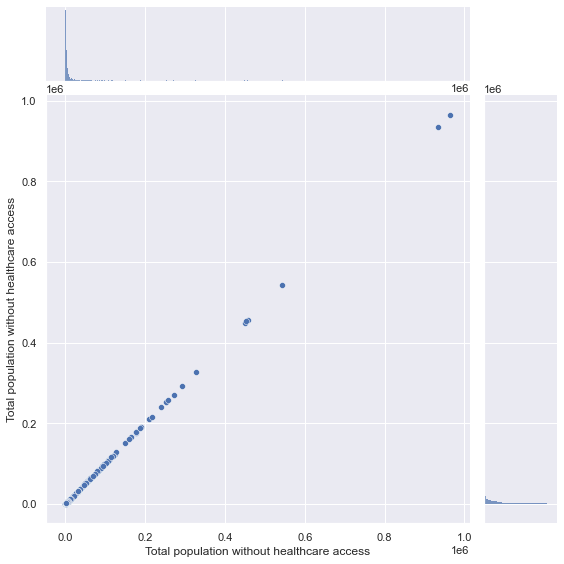

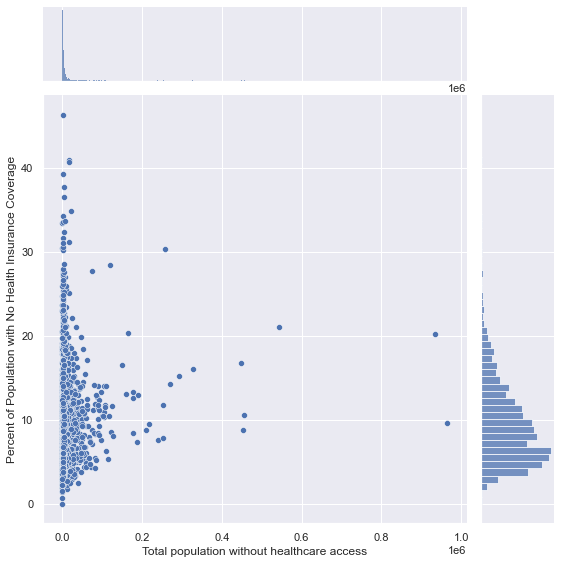

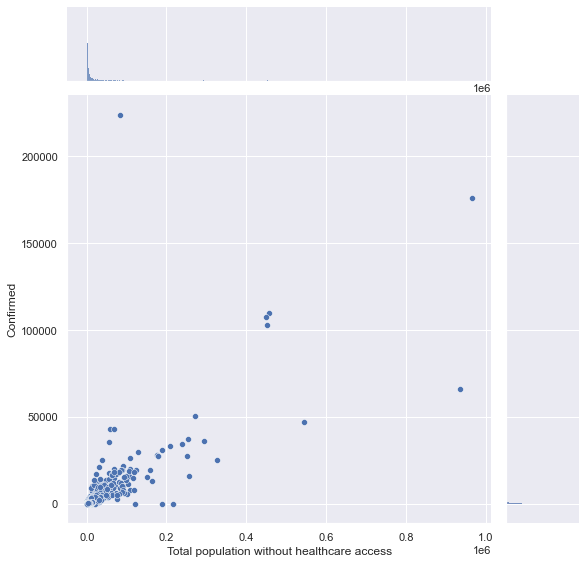

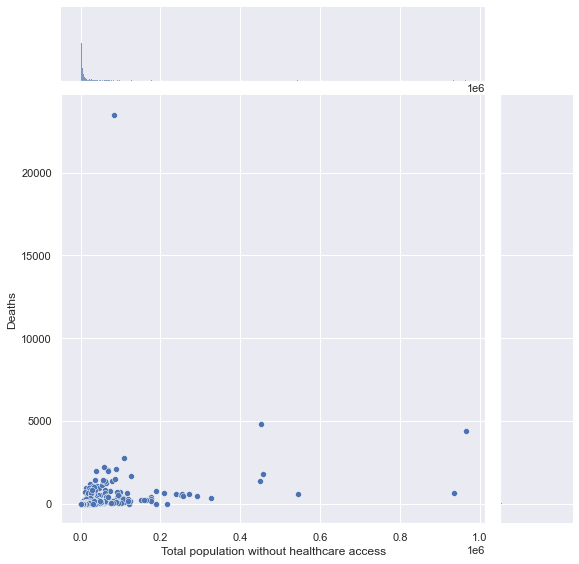

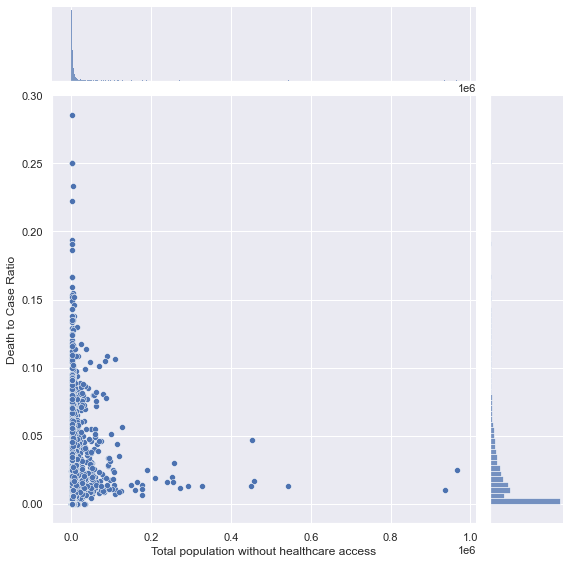

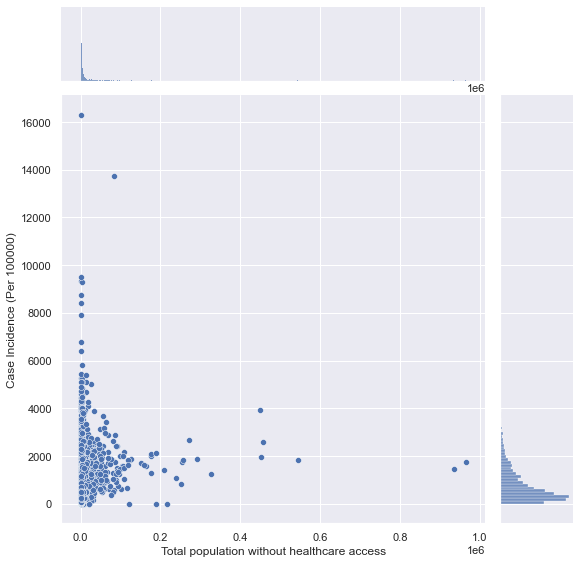

In [34]:
for var in usacovid_health:
    sb.jointplot(data = usacovid_health, x = "Total population without healthcare access", y = var, height = 8)

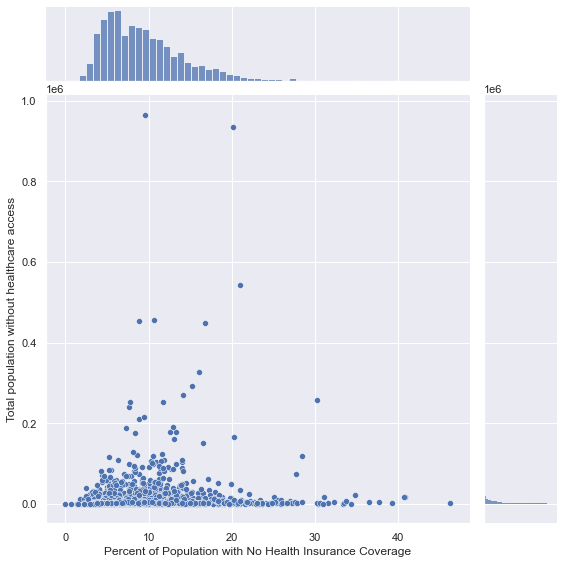

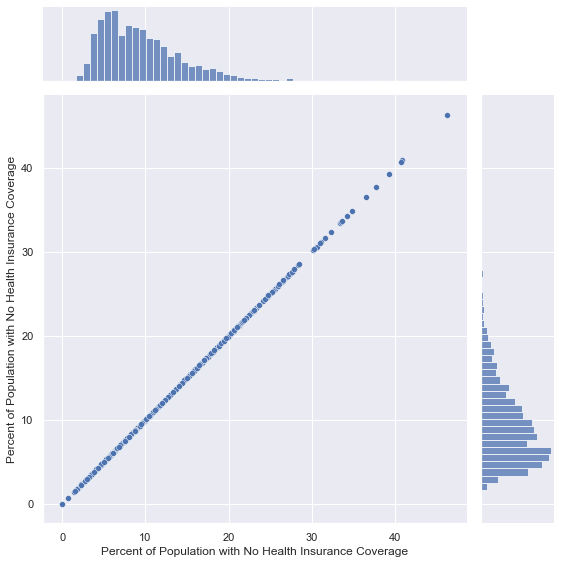

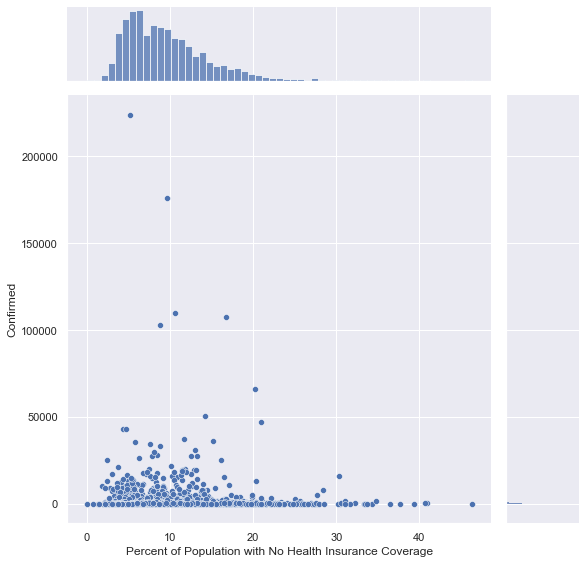

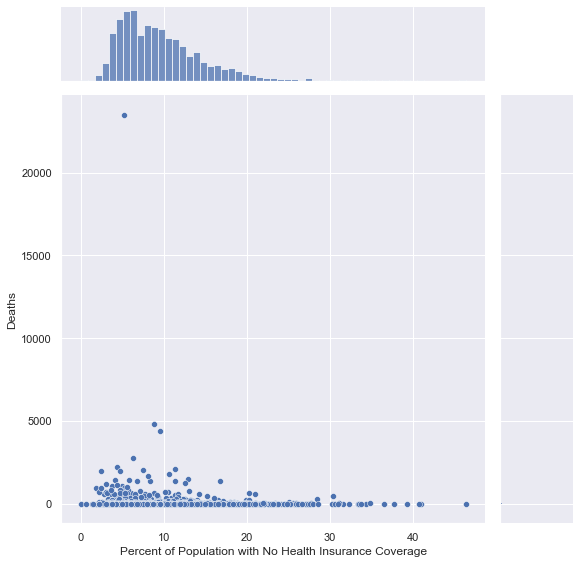

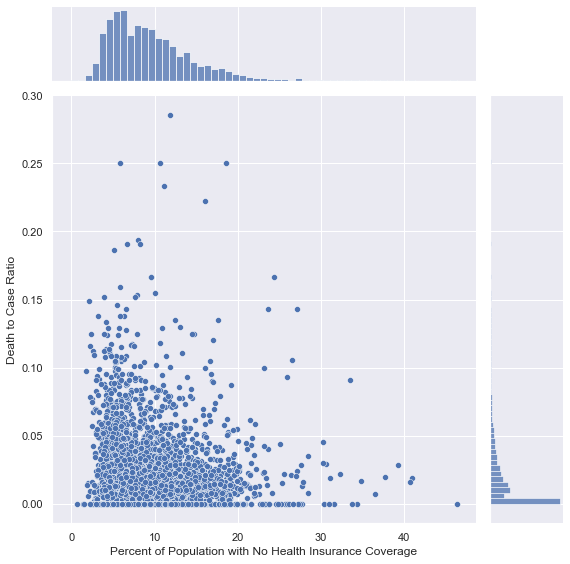

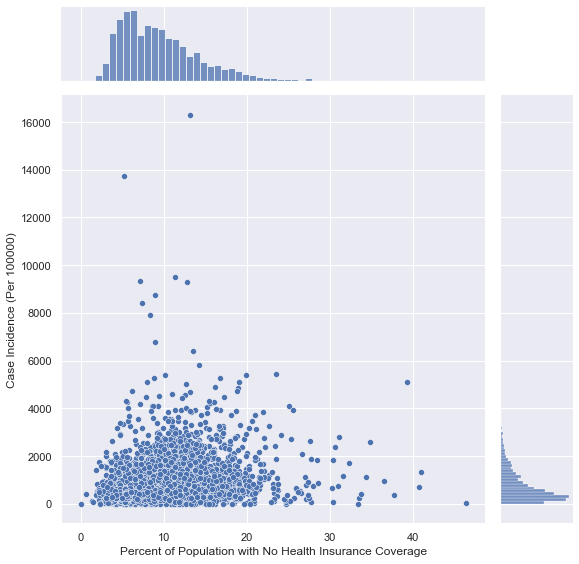

In [35]:
for var in usacovid_health:
    sb.jointplot(data = usacovid_health, x = "Percent of Population with No Health Insurance Coverage", y = var, height = 8)

In [36]:
usacovid_health.corr()

Total population without healthcare access  \
Total population without healthcare access                                            1.000000   
Percent of Population with No Health Insurance ...                                    0.071680   
Confirmed                                                                             0.749709   
Deaths                                                                                0.292921   
Death to Case Ratio                                                                   0.030366   
Case Incidence (Per 100000)                                                           0.137097   

                                                    Percent of Population with No Health Insurance Coverage  \
Total population without healthcare access                                                   0.071680         
Percent of Population with No Health Insurance ...                                           1.000000         
Confirmed                                                                                    0.002245         
Deaths                                                                                      -0.035030         
Death to Case Ratio                                                                         -0.059378         
Case Incidence (Per 100000)                                                                  0.246788         

                                                    Confirmed    Deaths  \
Total population without healthcare access           0.749709  0.292921   
Percent of Population with No Health Insurance ...   0.002245 -0.035030   
Confirmed                                            1.000000  0.794622   
Deaths                                               0.794622  1.000000   
Death to Case Ratio                                  0.084918  0.135629   
Case Incidence (Per 100000)                          0.296615  0.284435   

                                                    Death to Case Ratio  \
Total population without healthcare access                     0.030366   
Percent of Population with No Health Insurance ...            -0.059378   
Confirmed                                                      0.084918   
Deaths                                                         0.135629   
Death to Case Ratio                                            1.000000   
Case Incidence (Per 100000)                                    0.094840   

                                                    Case Incidence (Per 100000)  
Total population without healthcare access                             0.137097  
Percent of Population with No Health Insurance ...                     0.246788  
Confirmed                                                              0.296615  
Deaths                                                                 0.284435  
Death to Case Ratio                                                    0.094840  
Case Incidence (Per 100000)                                            1.000000

<AxesSubplot:>

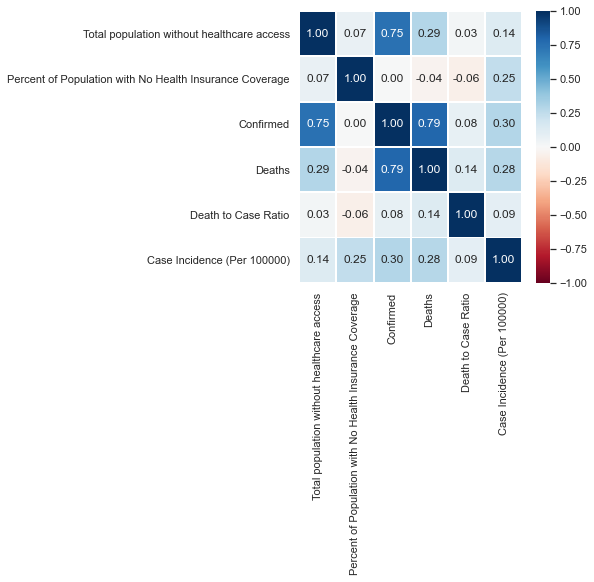

In [37]:
f = plt.figure(figsize=(5, 5))
sb.heatmap(usacovid_health.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 12}, cmap = "RdBu")

There is fairly high relationship between the Total population without healthcare access and the response variable Confirmed cases, however we also note that there is relatively high relationship between Percent of Population with No Health Insurance Coverage and Case Incidence, compared to the previous Occupation predictors where there is practically no linear correlation between the Occupation predictors and the response variables. Let us remove the outliers to see if there is any changes. 

In [38]:
usacovid_health_clean = pd.DataFrame(removeOutliers(usacovid_health))
usacovid_health_clean.head()

Total population without healthcare access  \
0                                        3856   
2                                        2544   
3                                        2201   
4                                        6159   
7                                       10737   

   Percent of Population with No Health Insurance Coverage  Confirmed  Deaths  \
0                                                7.1            932.0    20.0   
2                                               11.3            529.0     4.0   
3                                               10.7            327.0     2.0   
4                                               10.8            601.0     1.0   
7                                                9.5           1157.0     6.0   

   Death to Case Ratio  Case Incidence (Per 100000)  
0             0.021459                  1688.405797  
2             0.007561                  2051.819099  
3             0.006116                  1451.591424  
4             0.001664                  1042.588256  
7             0.005186                  1005.230325

In [39]:
usacovid_health_clean.describe()

Total population without healthcare access  \
count                                 2290.000000   
mean                                  2525.410480   
std                                   2416.957656   
min                                      5.000000   
25%                                    752.250000   
50%                                   1745.000000   
75%                                   3431.000000   
max                                  12287.000000   

       Percent of Population with No Health Insurance Coverage    Confirmed  \
count                                        2290.000000        2290.000000   
mean                                            8.997118         197.575109   
std                                             4.220234         244.448659   
min                                             0.700000           1.000000   
25%                                             5.600000          35.000000   
50%                                             8.300000         101.500000   
75%                                            11.500000         265.750000   
max                                            21.200000        1386.000000   

            Deaths  Death to Case Ratio  Case Incidence (Per 100000)  
count  2290.000000          2290.000000                  2290.000000  
mean      3.469432             0.013876                   620.724838  
std       5.861976             0.017138                   527.597532  
min       0.000000             0.000000                    17.765145  
25%       0.000000             0.000000                   244.392343  
50%       1.000000             0.008147                   438.118114  
75%       4.000000             0.022727                   835.997844  
max      32.000000             0.074074                  2480.875098

<AxesSubplot:>

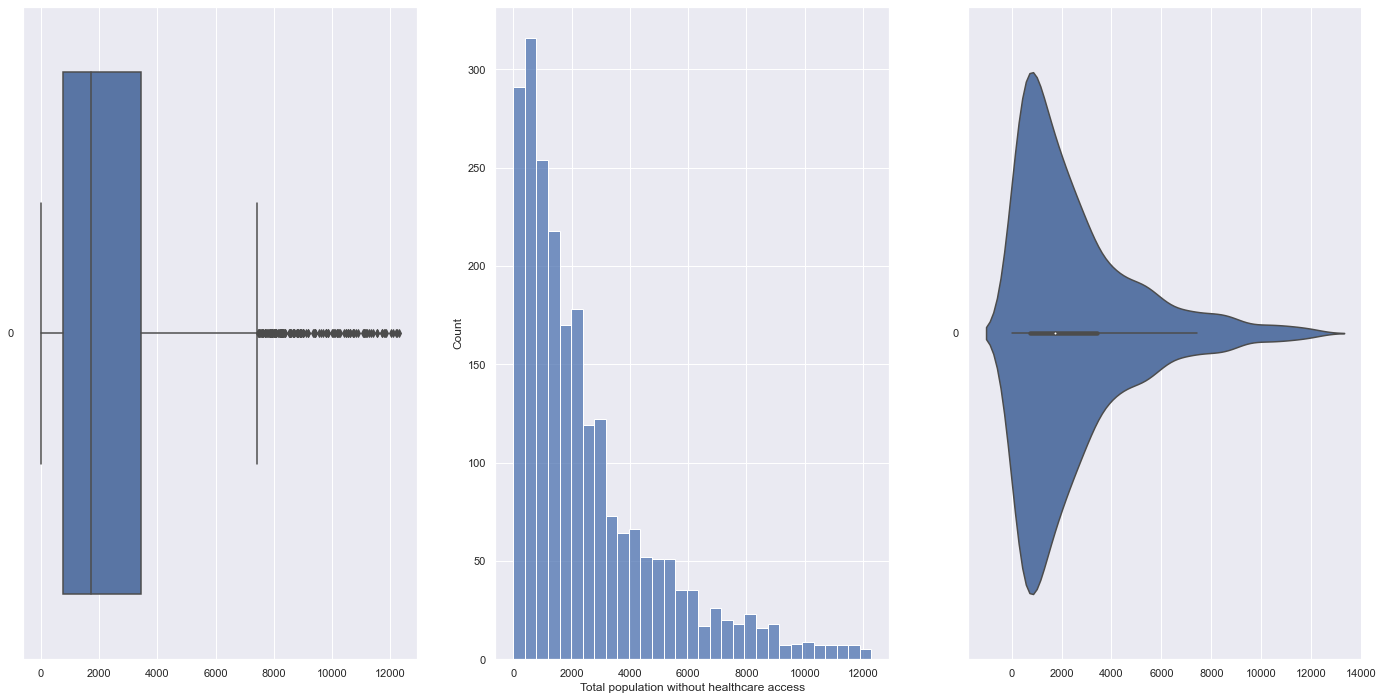

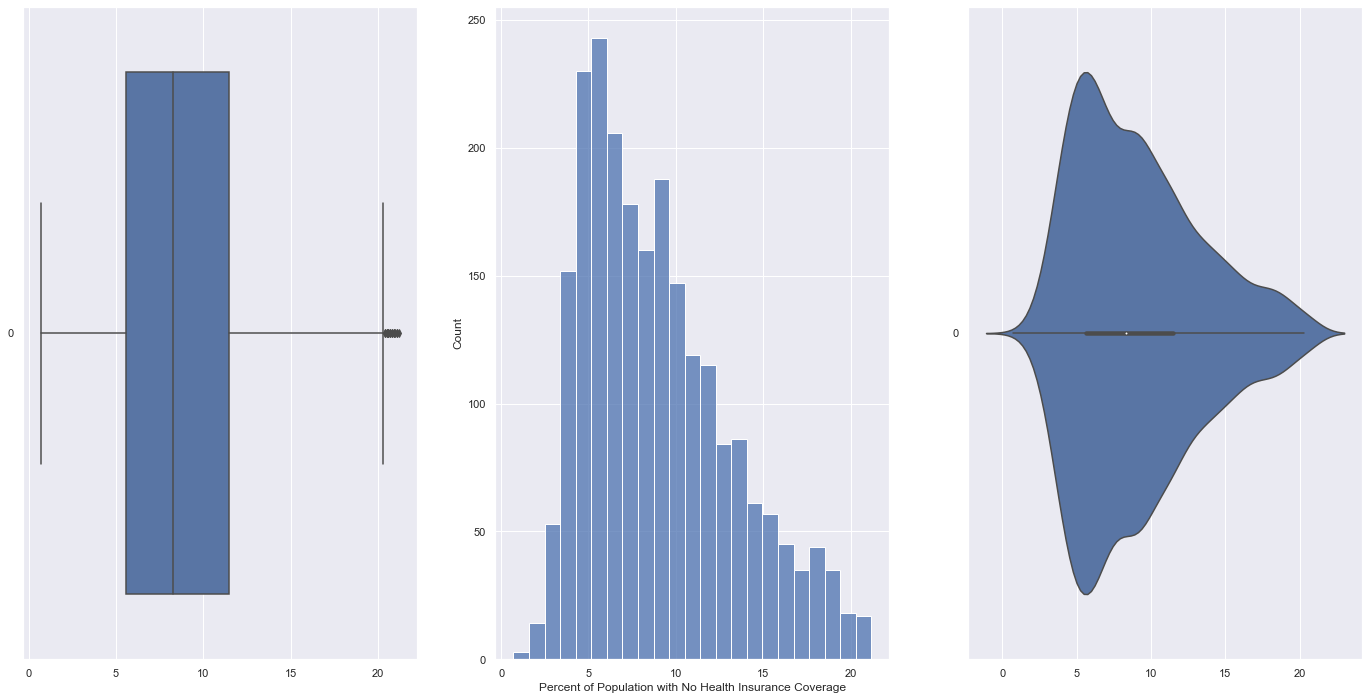

In [40]:
f, axes = plt.subplots(1, 3, figsize=(24, 12))

sb.boxplot(data = usacovid_health_clean['Total population without healthcare access'], orient = "h", ax = axes[0])
sb.histplot(data = usacovid_health_clean['Total population without healthcare access'], ax = axes[1])
sb.violinplot(data = usacovid_health_clean['Total population without healthcare access'], orient = "h", ax = axes[2])

f, axes = plt.subplots(1, 3, figsize=(24, 12))

sb.boxplot(data = usacovid_health_clean['Percent of Population with No Health Insurance Coverage'], orient = "h", ax = axes[0])
sb.histplot(data = usacovid_health_clean['Percent of Population with No Health Insurance Coverage'], ax = axes[1])
sb.violinplot(data = usacovid_health_clean['Percent of Population with No Health Insurance Coverage'], orient = "h", ax = axes[2])

In [41]:
usacovid_health_clean['Total population without healthcare access'].skew()

1.556859682077678

In [42]:
usacovid_health_clean['Percent of Population with No Health Insurance Coverage'].skew()

0.742224710068184

With outliers removed, it is clearly seen that the skewness of the predictor Total population without healthcare access is not that MASSIVELY skewed, but it is still relatively heavily right skewed with a skewness of 1.56, while the skewness of the predictor Percent of Population with No Health Insurance Coverage is halved to 0.74. Let us carry on to the analysis and maybe we can acquire some fruitful insight. 

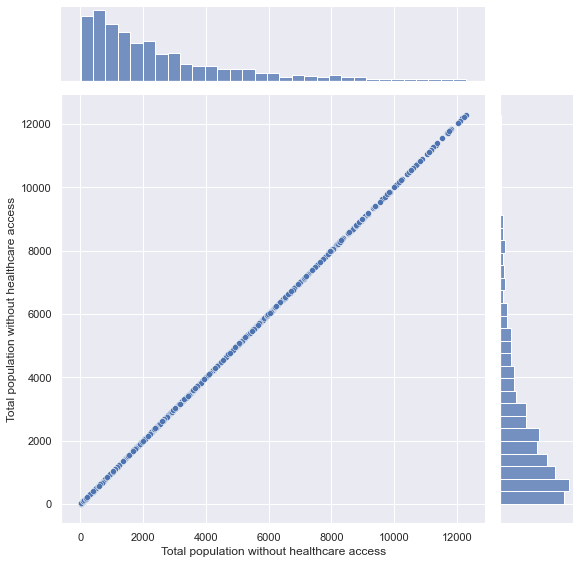

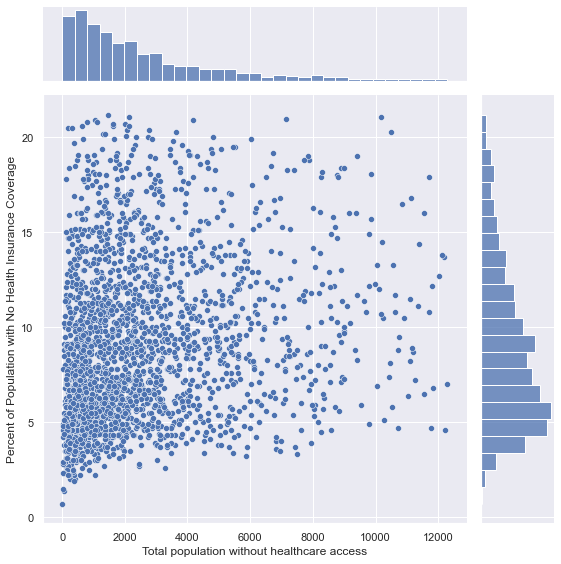

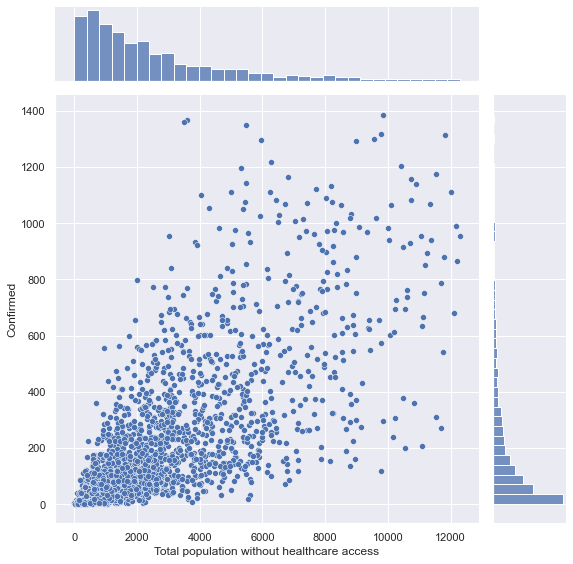

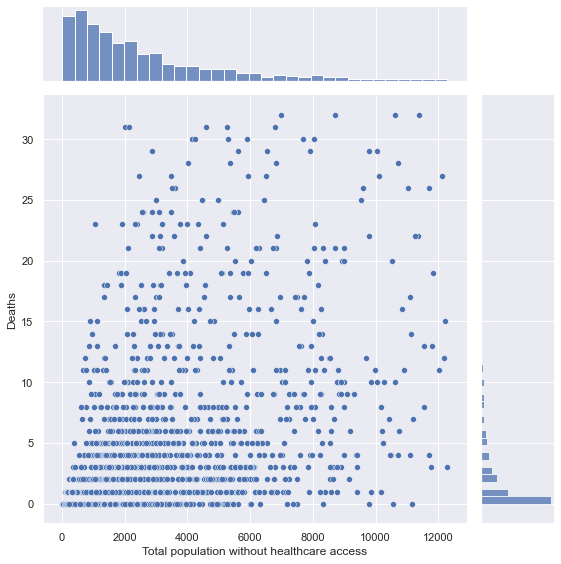

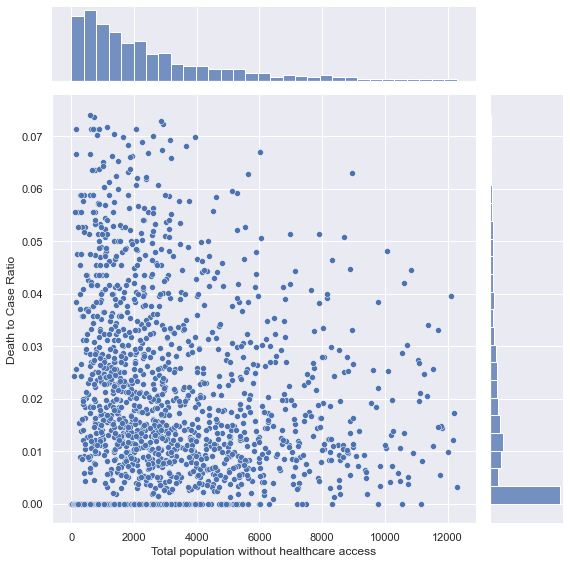

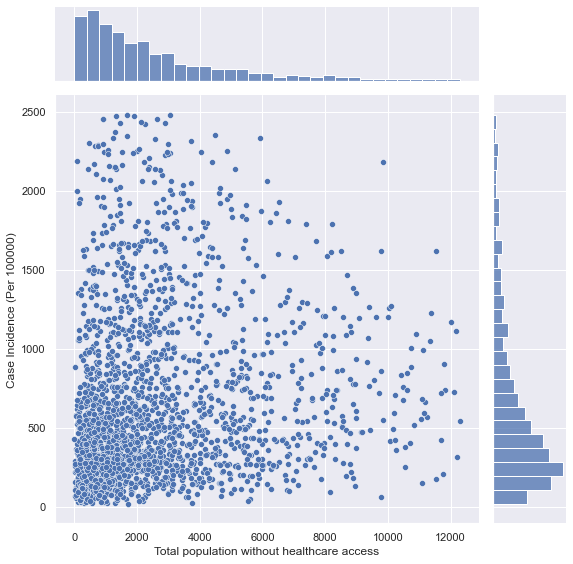

In [43]:
for var in usacovid_health_clean:
    sb.jointplot(data = usacovid_health_clean, x = "Total population without healthcare access", y = var, height = 8)

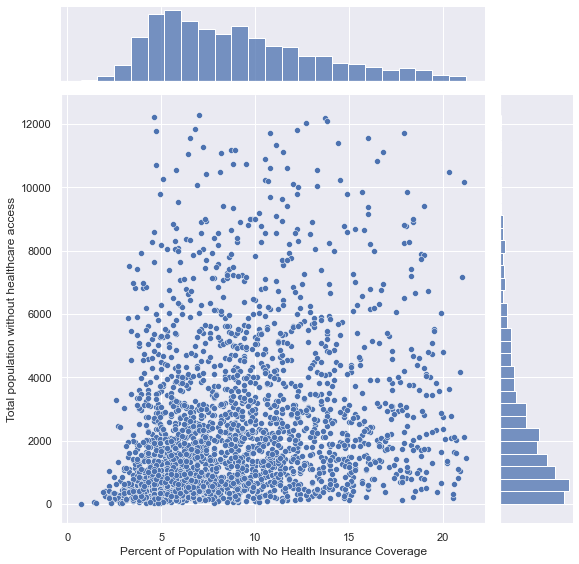

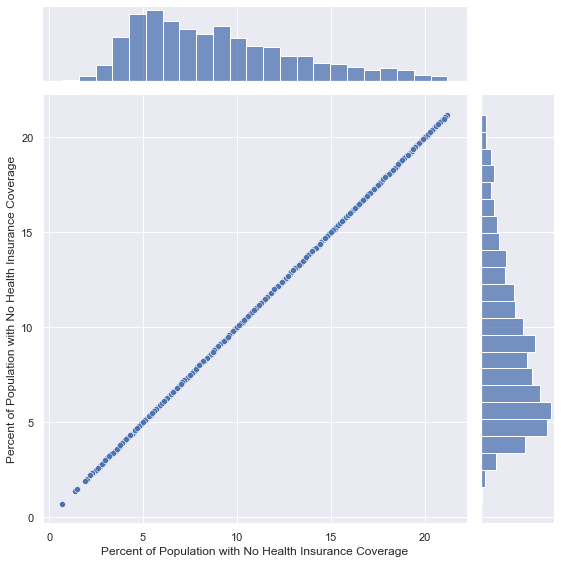

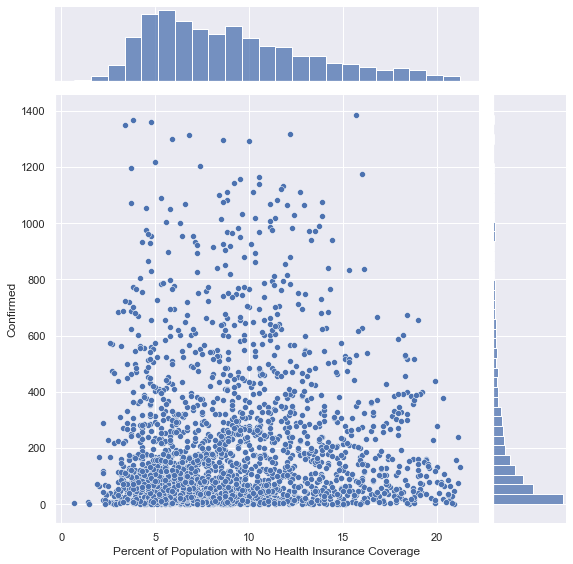

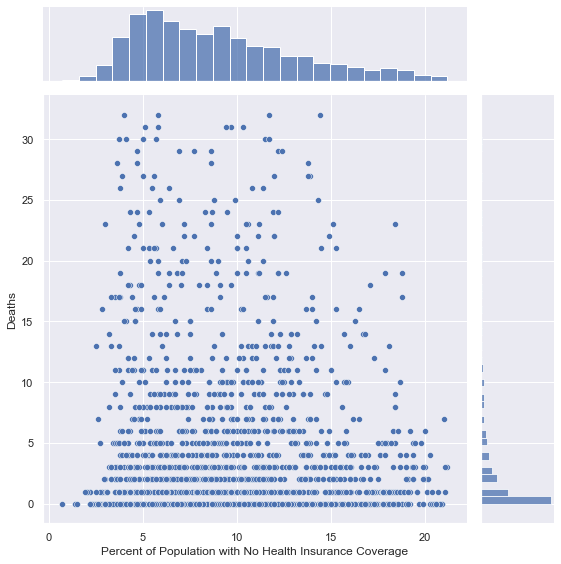

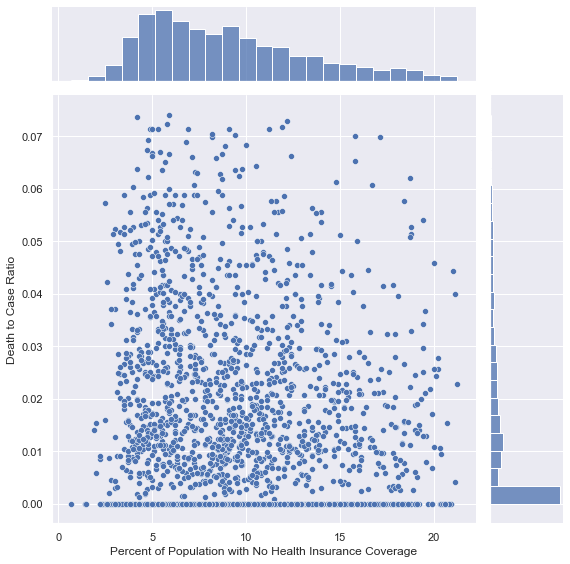

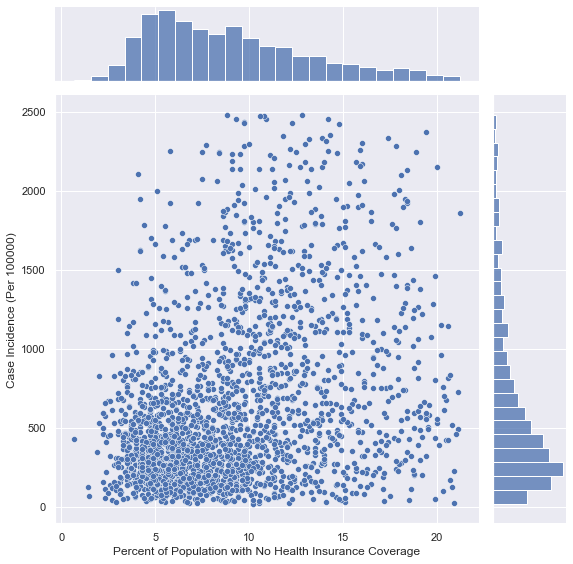

In [44]:
for var in usacovid_health_clean:
    sb.jointplot(data = usacovid_health_clean, x = "Percent of Population with No Health Insurance Coverage", y = var, height = 8)

In [45]:
usacovid_health_clean.corr()

Total population without healthcare access  \
Total population without healthcare access                                            1.000000   
Percent of Population with No Health Insurance ...                                    0.223736   
Confirmed                                                                             0.739274   
Deaths                                                                                0.513701   
Death to Case Ratio                                                                   0.159307   
Case Incidence (Per 100000)                                                           0.180063   

                                                    Percent of Population with No Health Insurance Coverage  \
Total population without healthcare access                                                   0.223736         
Percent of Population with No Health Insurance ...                                           1.000000         
Confirmed                                                                                    0.061601         
Deaths                                                                                       0.033041         
Death to Case Ratio                                                                          0.010225         
Case Incidence (Per 100000)                                                                  0.327620         

                                                    Confirmed    Deaths  \
Total population without healthcare access           0.739274  0.513701   
Percent of Population with No Health Insurance ...   0.061601  0.033041   
Confirmed                                            1.000000  0.705669   
Deaths                                               0.705669  1.000000   
Death to Case Ratio                                  0.173844  0.587195   
Case Incidence (Per 100000)                          0.564107  0.447863   

                                                    Death to Case Ratio  \
Total population without healthcare access                     0.159307   
Percent of Population with No Health Insurance ...             0.010225   
Confirmed                                                      0.173844   
Deaths                                                         0.587195   
Death to Case Ratio                                            1.000000   
Case Incidence (Per 100000)                                    0.212505   

                                                    Case Incidence (Per 100000)  
Total population without healthcare access                             0.180063  
Percent of Population with No Health Insurance ...                     0.327620  
Confirmed                                                              0.564107  
Deaths                                                                 0.447863  
Death to Case Ratio                                                    0.212505  
Case Incidence (Per 100000)                                            1.000000

<AxesSubplot:>

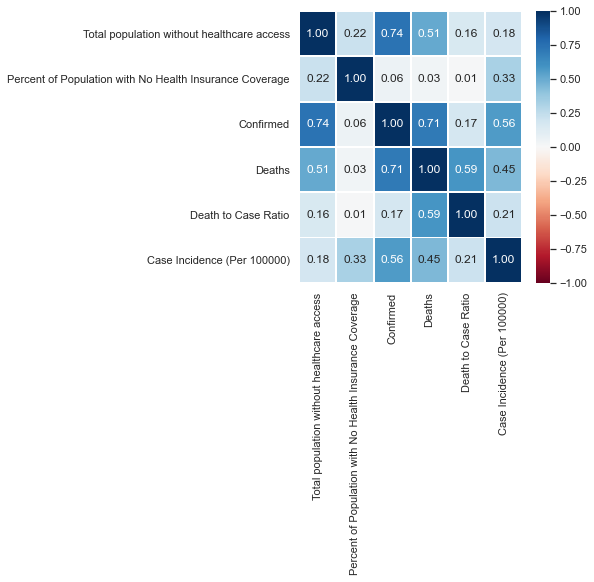

In [46]:
f = plt.figure(figsize=(5, 5))
sb.heatmap(usacovid_health_clean.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 12}, cmap = "RdBu")

Now this is surprising. Instead of the expected dip in the correlation, we see the opposite happening on both of the predictor variables against Deaths and Case Incidence. The relatively good correlation between Percent of Population with No Health Insurance Coverage and Case Incidence is a very important part here, because it really shows that the health insurance coverage will affect the Covid-19 cases.

## Multi-Variate Analysis: Creating a model to fit Response Variable

Moving forward with regression analysis, we will use the number of Confirmed cases as our response variable of choice as it makes sense both from a statistical perspective and geographic perspective. Statistically, Confirmed cases seems to have the highest correlation with each of our predictor variables, and geographically, it would make sense that when there are more individuals in a given household or county, the spread of the virus would quicken in those areas.

In [52]:
usacovid_ohmodel = usacovid_occuphealth[['Total - Civilian employed population 16 years and over', 'Percentage of Healthcare related workers', 'Percent of Population with No Health Insurance Coverage','Total population without healthcare access', 'Confirmed']]

In [48]:
usacovid_ohmodel.describe()

Total - Civilian employed population 16 years and over  \
count                                       3.220000e+03        
mean                                        4.840705e+04        
std                                         1.607070e+05        
min                                         3.300000e+01        
25%                                         4.608000e+03        
50%                                         1.075000e+04        
75%                                         2.948300e+04        
max                                         4.929863e+06        

       Percentage of Healthcare related workers  \
count                               3220.000000   
mean                                   0.040779   
std                                    0.011618   
min                                    0.000000   
25%                                    0.033565   
50%                                    0.041086   
75%                                    0.048482   
max                                    0.118237   

       Percent of Population with No Health Insurance Coverage      Confirmed  \
count                                        3220.000000          3220.000000   
mean                                            9.549627          1316.137578   
std                                             5.086483          6962.304363   
min                                             0.000000             0.000000   
25%                                             5.700000            43.000000   
50%                                             8.600000           158.000000   
75%                                            12.000000           585.000000   
max                                            46.300000        224051.000000   

       Case Incidence (Per 100000)  
count                  3220.000000  
mean                    878.110783  
std                     983.144191  
min                       0.000000  
25%                     274.108881  
50%                     565.918482  
75%                    1165.665050  
max                   16306.278070

Now we will split our data into 2 separate sets, train set and test set. We will start training our train set then use it to predict the test set. We utilise the 80:20 split here.

In [53]:
# Removing outliers before train_test_split
usacovid_ohmodel = pd.DataFrame(removeOutliers(usacovid_ohmodel))
usacovid_ohmodel.head()

Total - Civilian employed population 16 years and over  \
0                                              24522        
2                                               8413        
3                                               8387        
4                                              21917        
5                                               4319        

   Percentage of Healthcare related workers  \
0                                  0.036467   
2                                  0.019393   
3                                  0.027079   
4                                  0.041669   
5                                  0.019223   

   Percent of Population with No Health Insurance Coverage  \
0                                                7.1         
2                                               11.3         
3                                               10.7         
4                                               10.8         
5                                               11.4         

   Total population without healthcare access  Confirmed  
0                                      3856.0      932.0  
2                                      2544.0      529.0  
3                                      2201.0      327.0  
4                                      6159.0      601.0  
5                                      1122.0      409.0

In [55]:
usacovid_ohmodel.describe()

Total - Civilian employed population 16 years and over  \
count                                        2529.000000        
mean                                        12836.847371        
std                                         12496.031968        
min                                           113.000000        
25%                                          4140.000000        
50%                                          8459.000000        
75%                                         17527.000000        
max                                         66122.000000        

       Percentage of Healthcare related workers  \
count                               2529.000000   
mean                                   0.040228   
std                                    0.010873   
min                                    0.011295   
25%                                    0.032847   
50%                                    0.040344   
75%                                    0.047917   
max                                    0.070517   

       Percent of Population with No Health Insurance Coverage  \
count                                        2529.000000         
mean                                            9.173863         
std                                             4.236972         
min                                             0.700000         
25%                                             5.800000         
50%                                             8.500000         
75%                                            11.800000         
max                                            21.100000         

       Total population without healthcare access    Confirmed  
count                                 2529.000000  2529.000000  
mean                                  2443.388691   215.213919  
std                                   2287.386894   265.327389  
min                                      5.000000     0.000000  
25%                                    758.000000    35.000000  
50%                                   1718.000000   108.000000  
75%                                   3304.000000   291.000000  
max                                  12440.000000  1386.000000

In [59]:
usacovid_ohmodel_train, usacovid_ohmodel_test = train_test_split(usacovid_ohmodel, test_size=0.2)

In [62]:
usa_occuphealth_predictors_train = pd.DataFrame(usacovid_ohmodel_train[['Total - Civilian employed population 16 years and over', 'Percentage of Healthcare related workers', 'Percent of Population with No Health Insurance Coverage','Total population without healthcare access']])
usa_occuphealth_response_train = pd.DataFrame(usacovid_ohmodel_train[['Confirmed']])
usa_occuphealth_predictors_test = pd.DataFrame(usacovid_ohmodel_test[['Total - Civilian employed population 16 years and over', 'Percentage of Healthcare related workers', 'Percent of Population with No Health Insurance Coverage','Total population without healthcare access']])
usa_occuphealth_response_test = pd.DataFrame(usacovid_ohmodel_test[['Confirmed']])

It should be noted here that the train_test_split function of SciKit-Learn is random, and thus results may differ from each run of the analysis

In [63]:
linreg.fit(usa_occuphealth_predictors_train, usa_occuphealth_response_train)

LinearRegression()

In [64]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)
pd.DataFrame(list(zip(usa_occuphealth_predictors_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

Intercept 	: b =  [102.53509675]
Coefficients 	: a =  [[ 3.00142348e-03 -1.95359613e+03 -9.18484080e-01  6.66312458e-02]]


Predictors  Coefficients
0  Total - Civilian employed population 16 years ...      0.003001
1           Percentage of Healthcare related workers  -1953.596131
2  Percent of Population with No Health Insurance...     -0.918484
3         Total population without healthcare access      0.066631

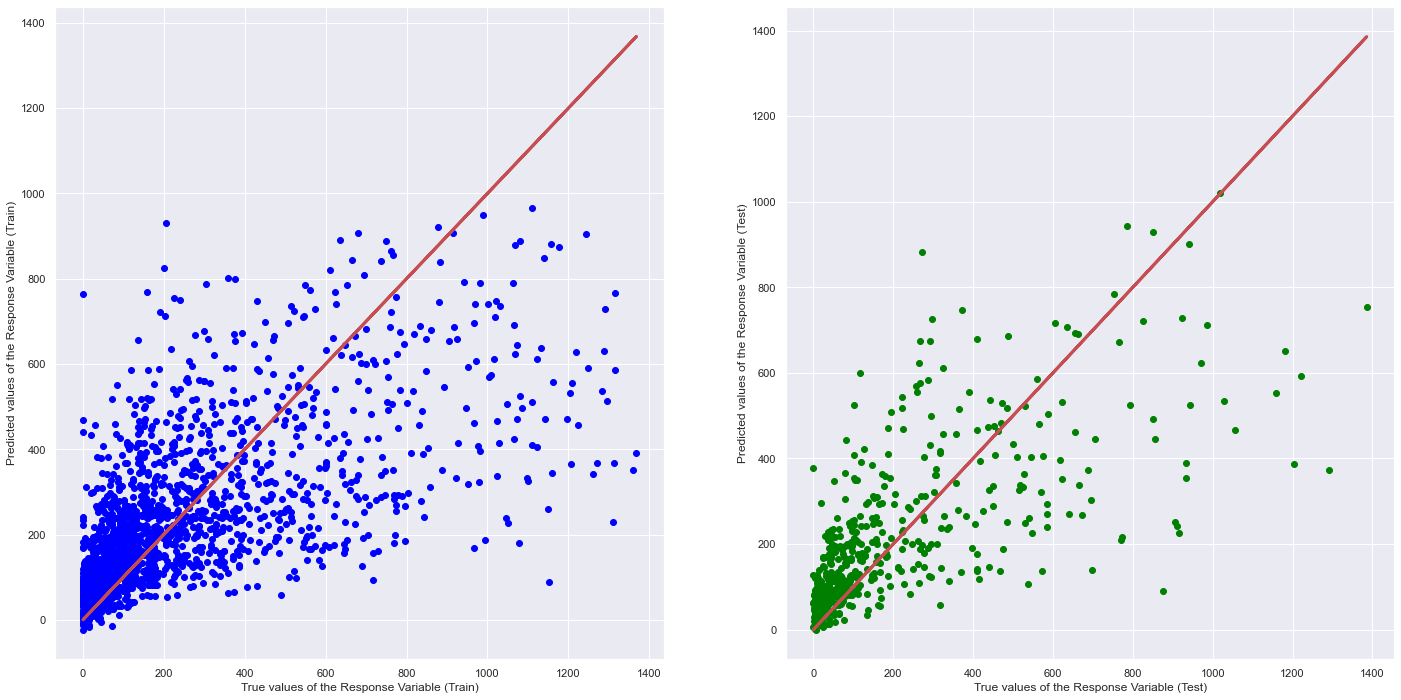

In [65]:
# Predict the Total values from Predictors
usa_occuphealth_response_train_pred = linreg.predict(usa_occuphealth_predictors_train)
usa_occuphealth_response_test_pred = linreg.predict(usa_occuphealth_predictors_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(usa_occuphealth_response_train, usa_occuphealth_response_train_pred, color = "blue")
axes[0].plot(usa_occuphealth_response_train, usa_occuphealth_response_train, 'r-', linewidth = 3)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(usa_occuphealth_response_test, usa_occuphealth_response_test_pred, color = "green")
axes[1].plot(usa_occuphealth_response_test, usa_occuphealth_response_test, 'r-', linewidth = 3)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [66]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(usa_occuphealth_predictors_train, usa_occuphealth_response_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(usa_occuphealth_response_train, usa_occuphealth_response_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(usa_occuphealth_predictors_test, usa_occuphealth_response_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(usa_occuphealth_response_test, usa_occuphealth_response_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4574291069328338
Mean Squared Error (MSE) 	: 38782.81781149647

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.481740697902143
Mean Squared Error (MSE) 	: 34103.25385336802



In [67]:
from sklearn.tree import DecisionTreeRegressor

# Linear Regression using Train Data
dt = DecisionTreeRegressor(max_depth=6)
dt.fit(usa_occuphealth_predictors_train, usa_occuphealth_response_train)

# Predict the Total values from Predictors
y_train_pred = dt.predict(usa_occuphealth_predictors_train)
y_test_pred = dt.predict(usa_occuphealth_predictors_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", dt.score(usa_occuphealth_predictors_train, usa_occuphealth_response_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(usa_occuphealth_response_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", dt.score(usa_occuphealth_predictors_test, usa_occuphealth_response_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(usa_occuphealth_response_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5749968336027567
Mean Squared Error (MSE) 	: 30379.109130819077

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.3645096976916308
Mean Squared Error (MSE) 	: 41817.45896937856



## Regression Analysis: Using only Total - Civilian employed population 16 years and over

In [69]:
usa_occupation_totalemp_train = pd.DataFrame(usacovid_ohmodel_train[['Total - Civilian employed population 16 years and over']])
usa_occupation_confirmed_train = pd.DataFrame(usacovid_ohmodel_train[['Confirmed']])
usa_occupation_totalemp_test = pd.DataFrame(usacovid_ohmodel_test[['Total - Civilian employed population 16 years and over']])
usa_occupation_confirmed_test = pd.DataFrame(usacovid_ohmodel_test[['Confirmed']])

In [70]:
linreg.fit(usa_occupation_totalemp_train, usa_occupation_confirmed_train)

LinearRegression()

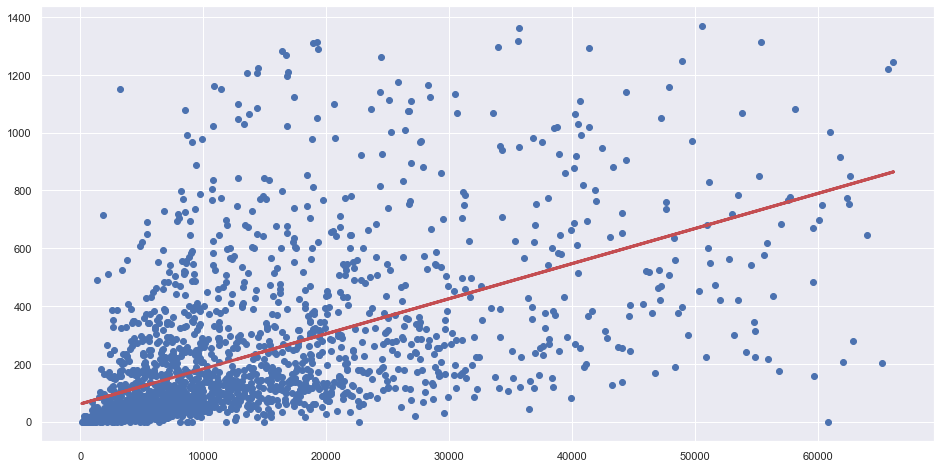

In [72]:
# Formula for the Regression line
regline_x = usa_occupation_totalemp_train
regline_y = linreg.intercept_ + linreg.coef_ * usa_occupation_totalemp_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(usa_occupation_totalemp_train, usa_occupation_confirmed_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

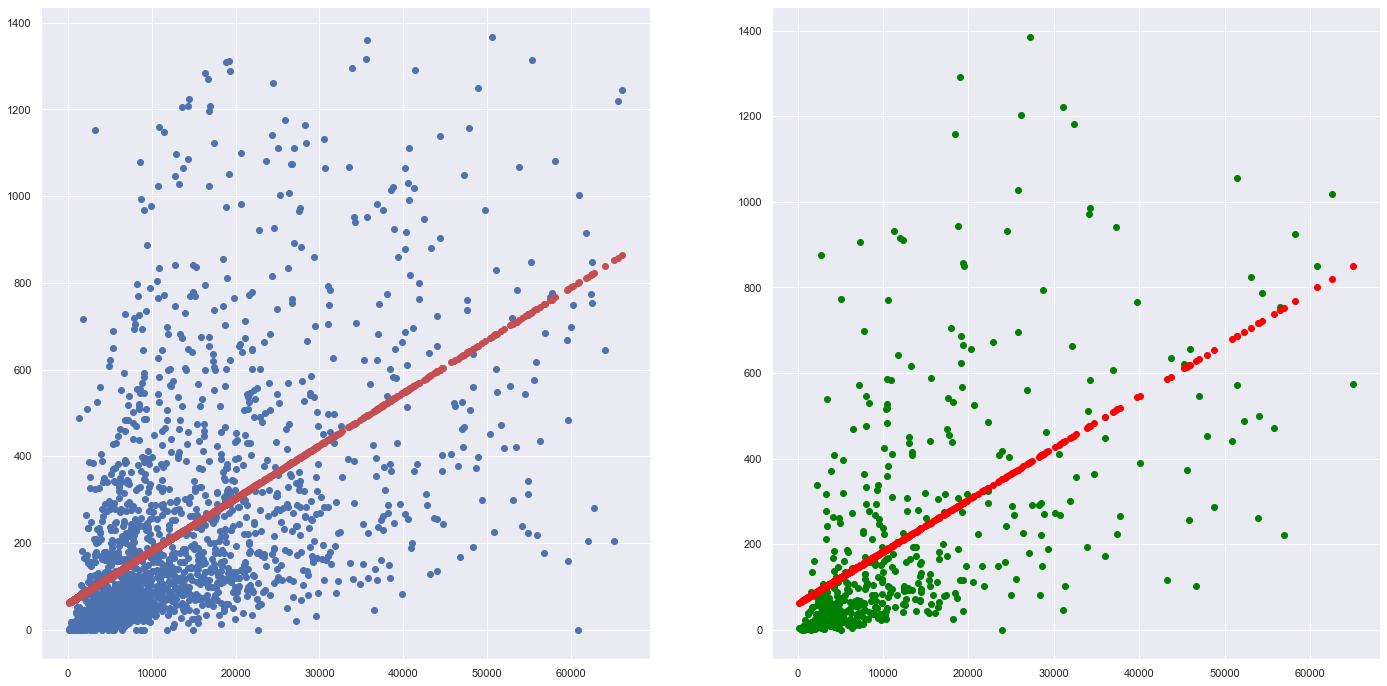

In [73]:
usa_occupation_confirmed_train_pred = linreg.predict(usa_occupation_totalemp_train)

# Plot the Linear Regression line
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(usa_occupation_totalemp_train, usa_occupation_confirmed_train)
axes[0].scatter(usa_occupation_totalemp_train, usa_occupation_confirmed_train_pred, color = "r")

usa_occupation_confirmed_test_pred = linreg.predict(usa_occupation_totalemp_test)

# Plot the Predictions
axes[1].scatter(usa_occupation_totalemp_test, usa_occupation_confirmed_test, color = "green")
axes[1].scatter(usa_occupation_totalemp_test, usa_occupation_confirmed_test_pred, color = "red")
plt.show()

In [74]:
# Explained Variance (R^2)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(usa_occupation_totalemp_train, usa_occupation_confirmed_train))

mse = mean_sq_err(usa_occupation_confirmed_train, usa_occupation_confirmed_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))
print("")

# Explained Variance (R^2)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(usa_occupation_totalemp_test, usa_occupation_confirmed_test))

mse = mean_sq_err(usa_occupation_confirmed_test, usa_occupation_confirmed_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3223909938223781
Mean Squared Error (MSE) 	: 48435.30489712922
Root Mean Squared Error (RMSE) 	: 220.08022377562511

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.33621255076327716
Mean Squared Error (MSE) 	: 43679.50906885073
Root Mean Squared Error (RMSE) 	: 208.99643314863232


In [75]:
# Linear Regression using Train Data
dt = DecisionTreeRegressor(max_depth=6)
dt.fit(usa_occupation_totalemp_train, usa_occupation_confirmed_train)

# Predict the Total values from Predictors
y_train_pred = dt.predict(usa_occupation_totalemp_train)
y_test_pred = dt.predict(usa_occupation_totalemp_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", dt.score(usa_occupation_totalemp_train, usa_occupation_confirmed_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(usa_occupation_confirmed_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", dt.score(usa_occupation_totalemp_test, usa_occupation_confirmed_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(usa_occupation_confirmed_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4333319424594443


NameError: name 'usa_population_confirmed_train' is not defined